In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd 

In [18]:
df = pd.read_csv('SeoulBikeData.csv', encoding = "ISO-8859-1")

In [20]:
import pandas as pd

file_path = 'http://localhost:8888/edit/anaconda3/SeoulBikeData.csv'

# Try reading the CSV file with a different encoding
df = pd.read_csv('SeoulBikeData,csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'SeoulBikeData,csv'

In [21]:
df = pd.read_csv('SeoulBikeData.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte

In [16]:
df = pd.read_csv('SeoulBikeData.csv', encoding = "ISO-8859-1")

In [17]:
df = pd.read_csv('SeoulBikeData.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte

In [215]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [17]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [20]:
df.shape

(8760, 14)

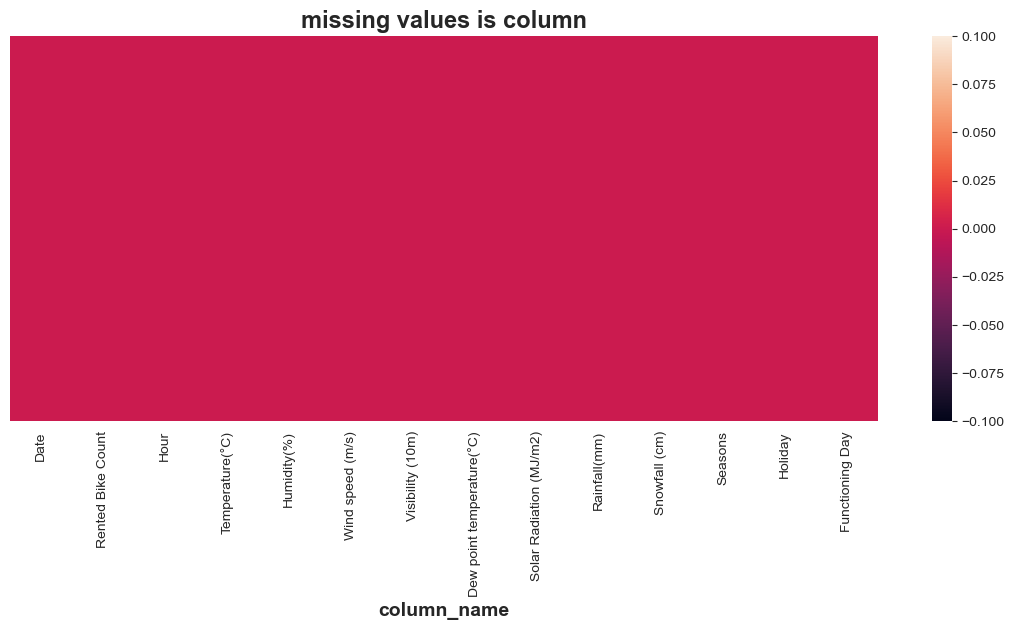

In [21]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values is column",fontweight="bold", size=17)
plt.show()

In [22]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [23]:
df.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [24]:
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

<AxesSubplot:>

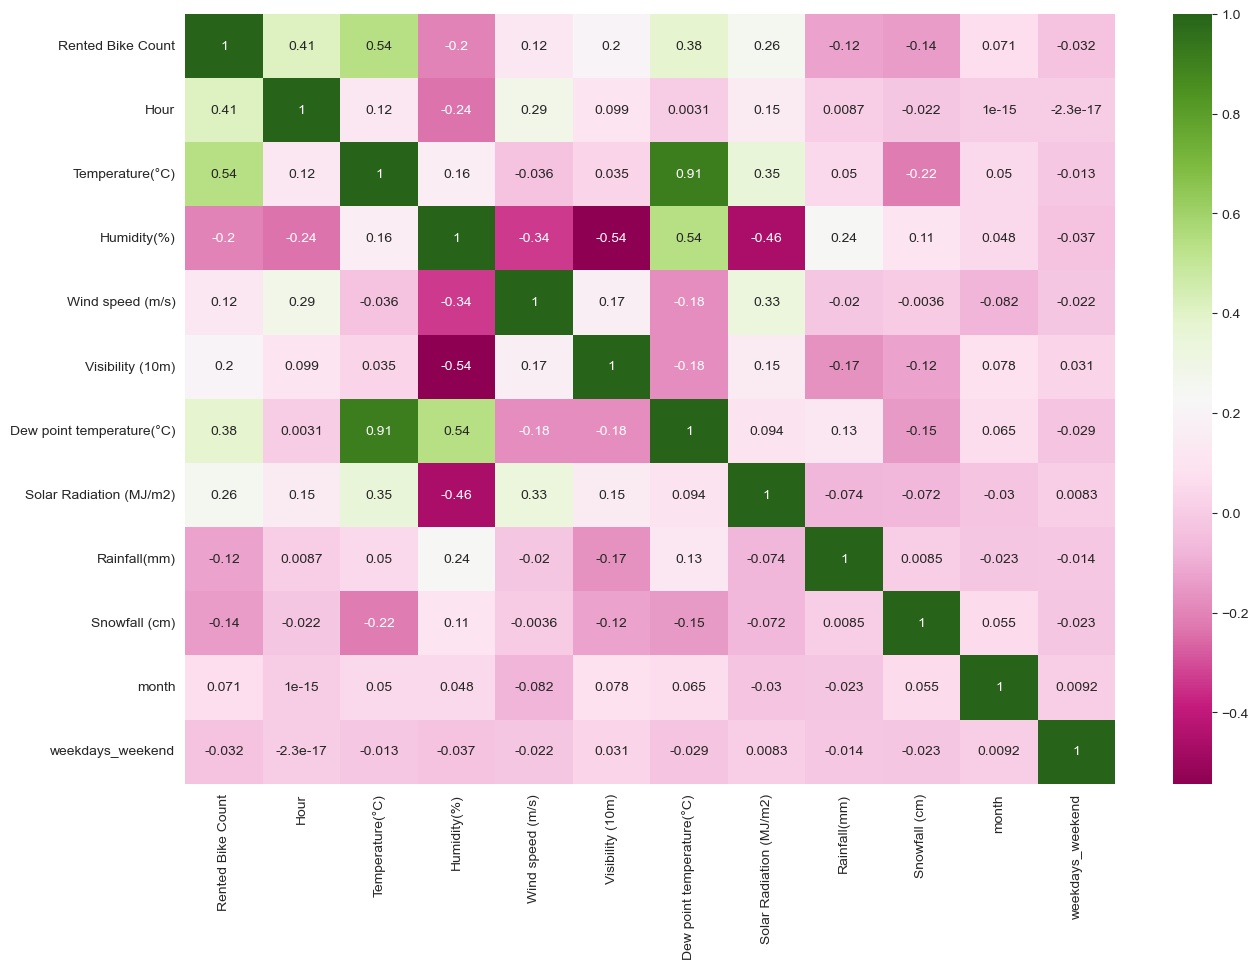

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [27]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

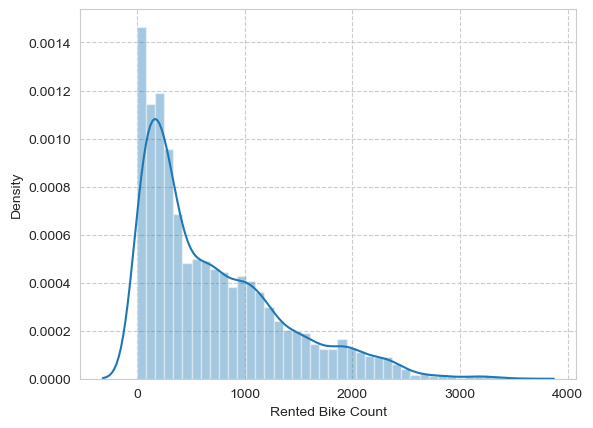

In [28]:
sns.distplot(df['Rented Bike Count'])

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

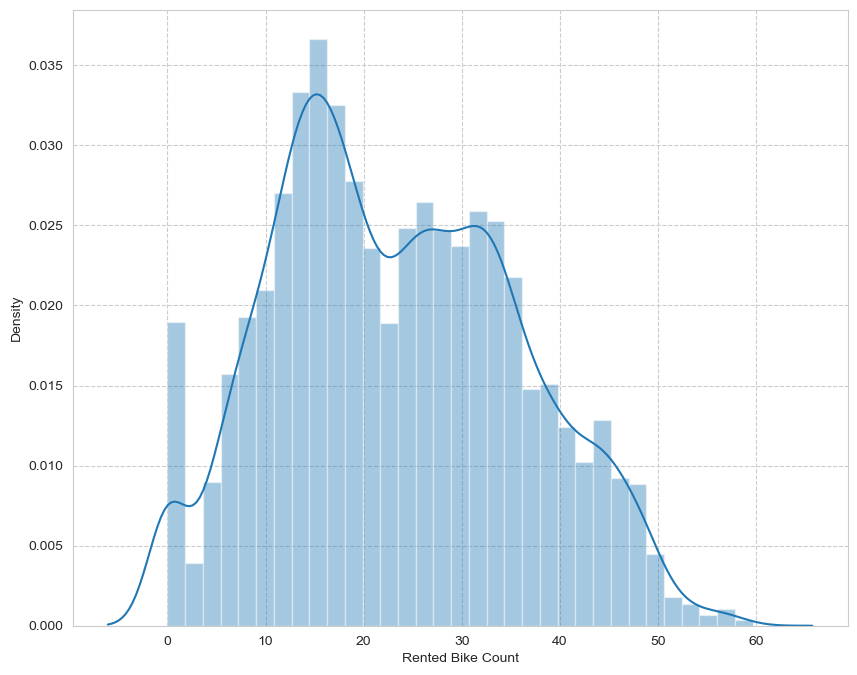

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [30]:
numeric_features= df.select_dtypes(exclude='object')

In [31]:
numeric_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [32]:
numeric_features.describe().transpose()


count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

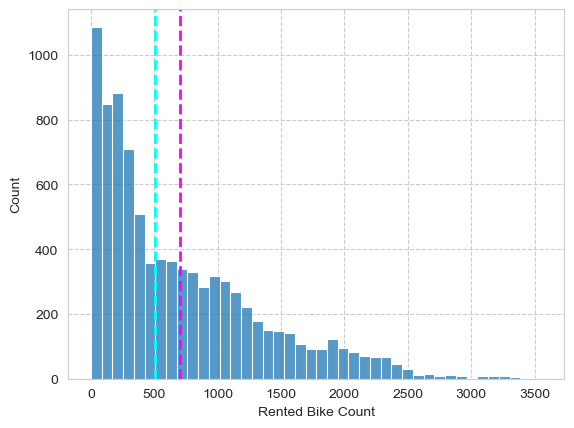

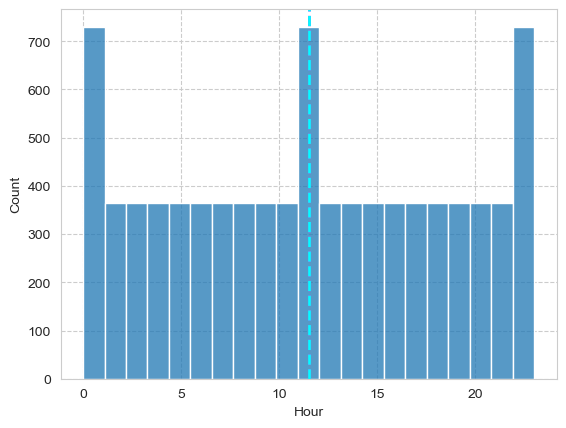

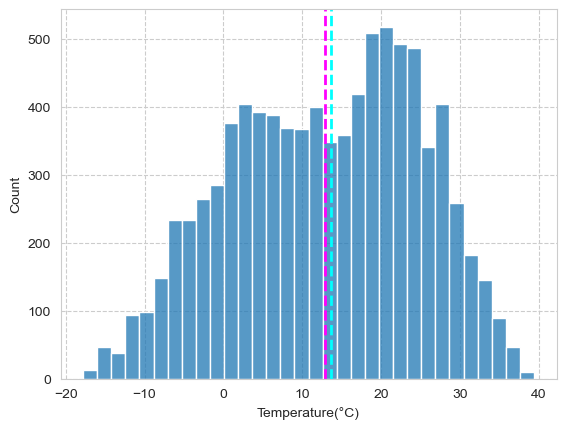

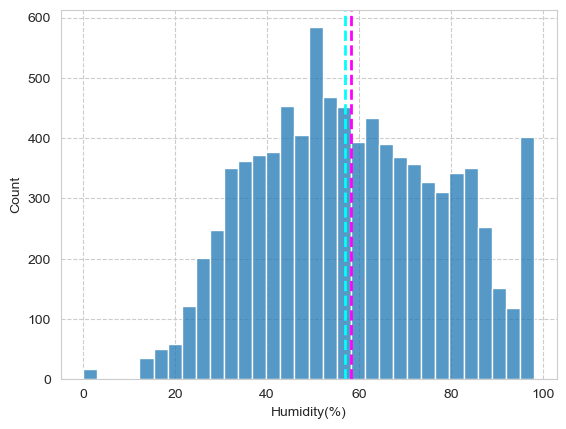

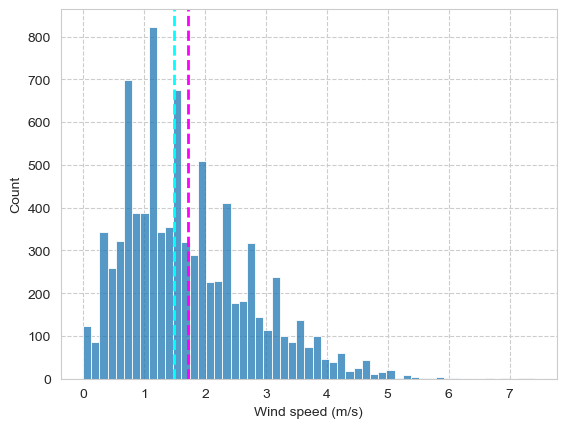

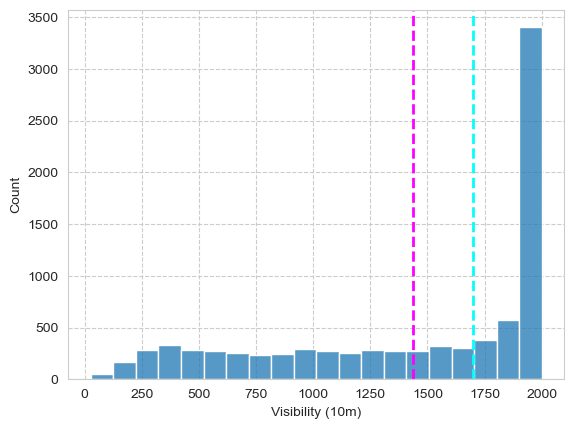

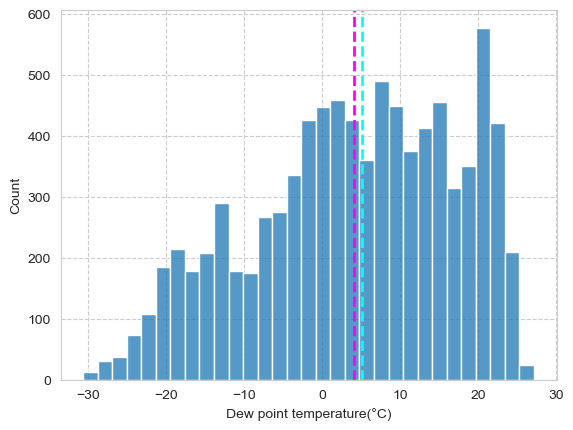

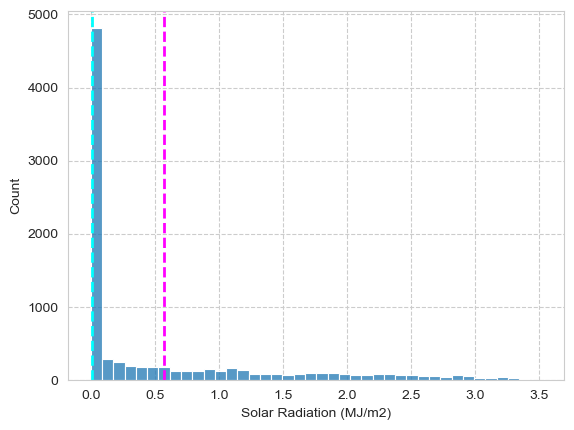

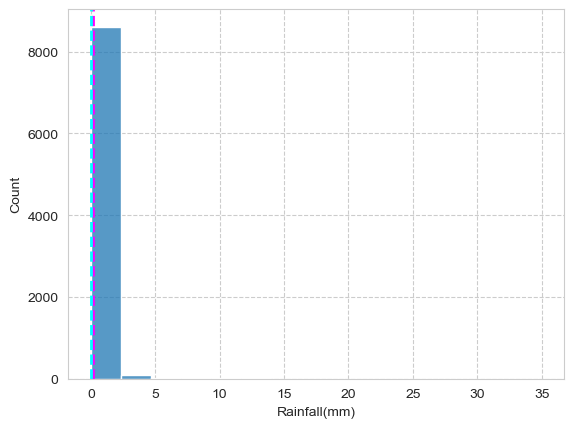

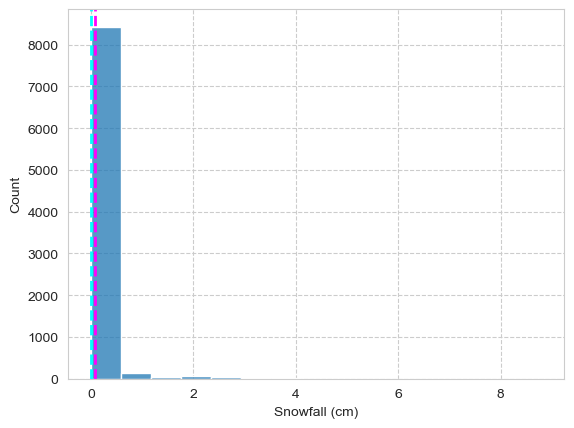

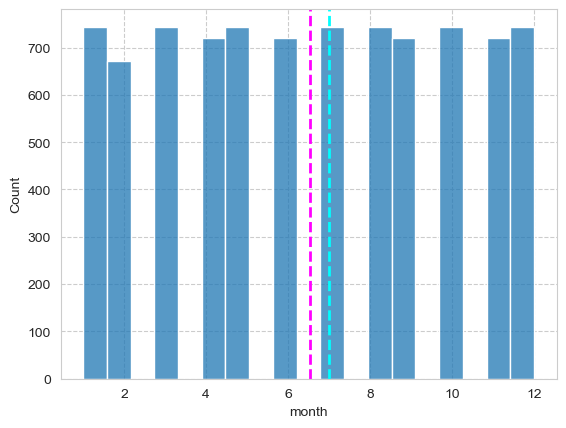

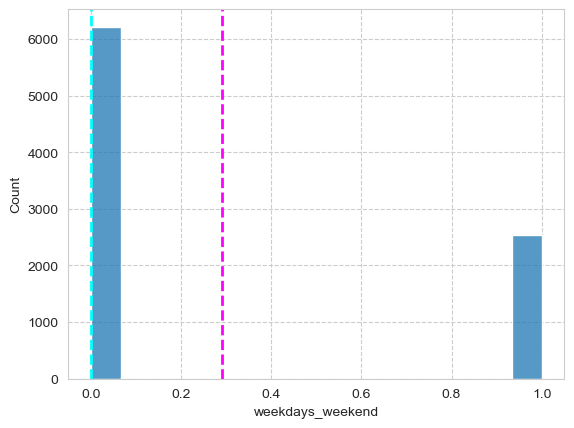

In [33]:
for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

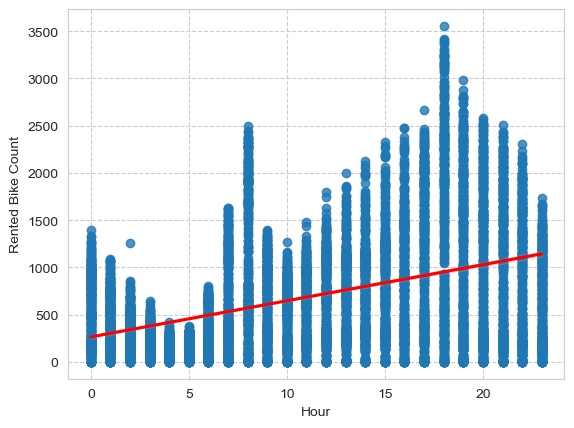

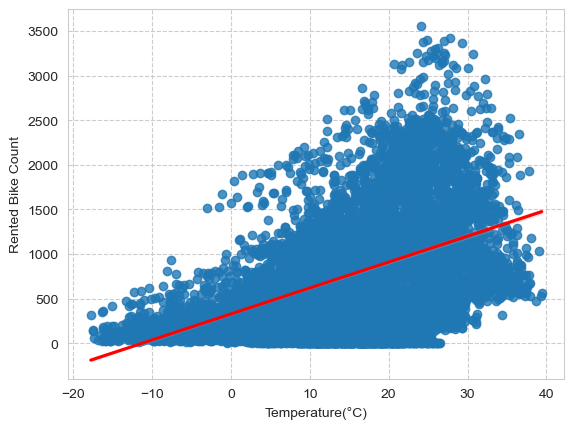

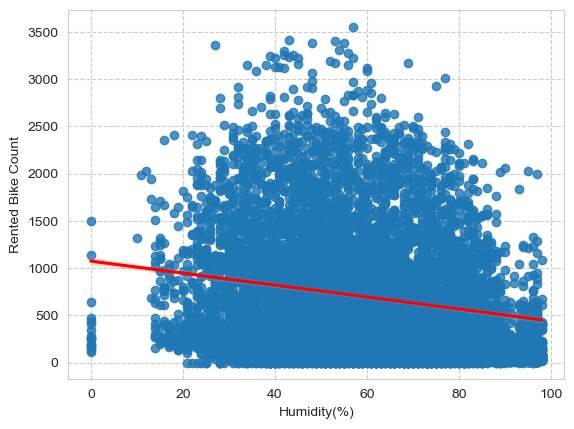

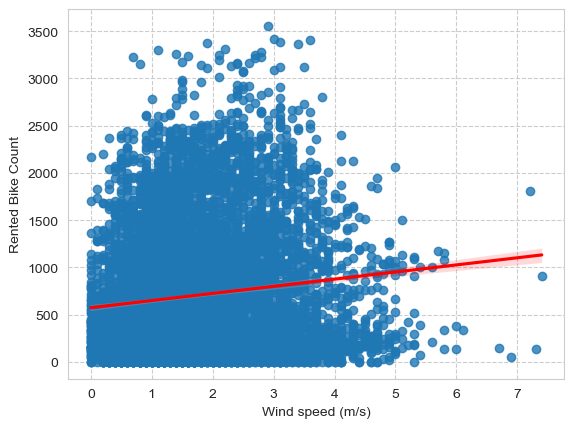

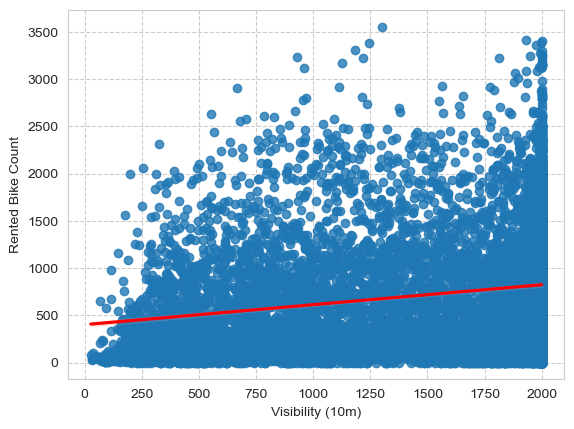

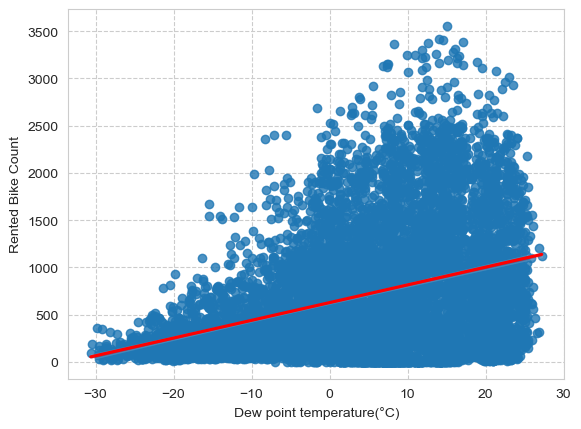

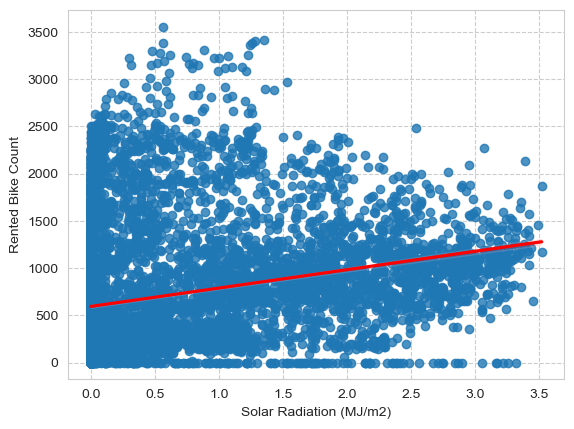

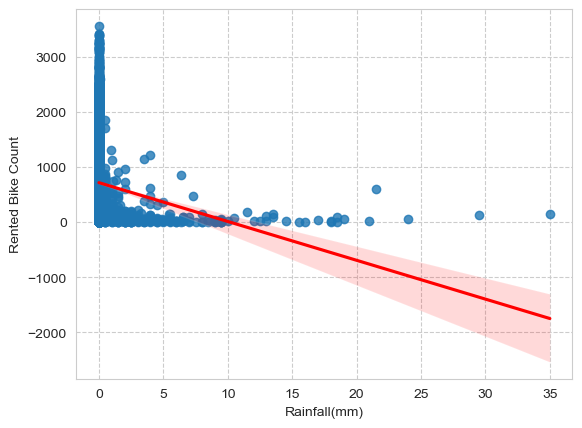

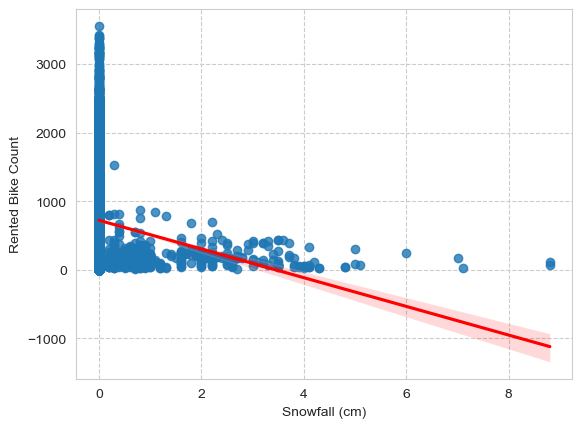

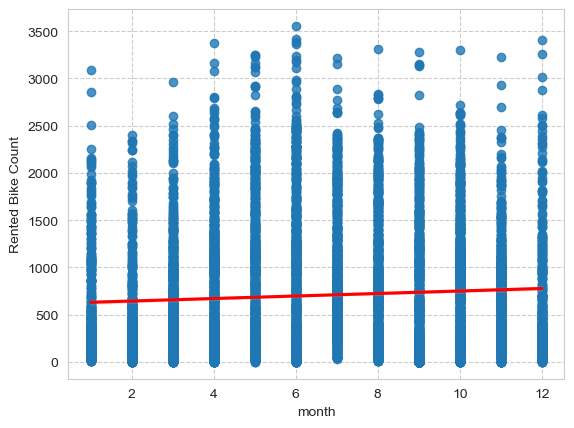

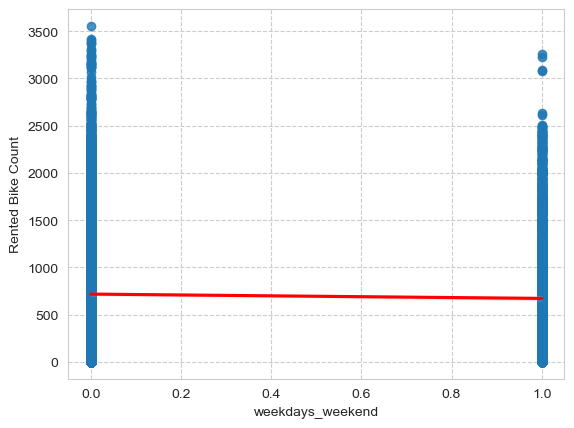

In [34]:
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [35]:
categorical_features= df.select_dtypes(include='object')

In [36]:
categorical_features


Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

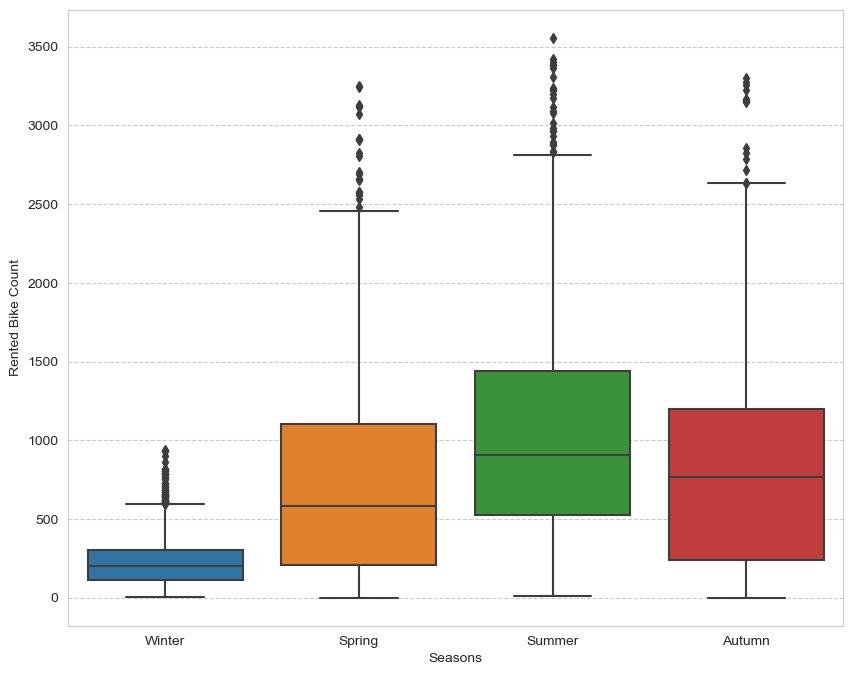

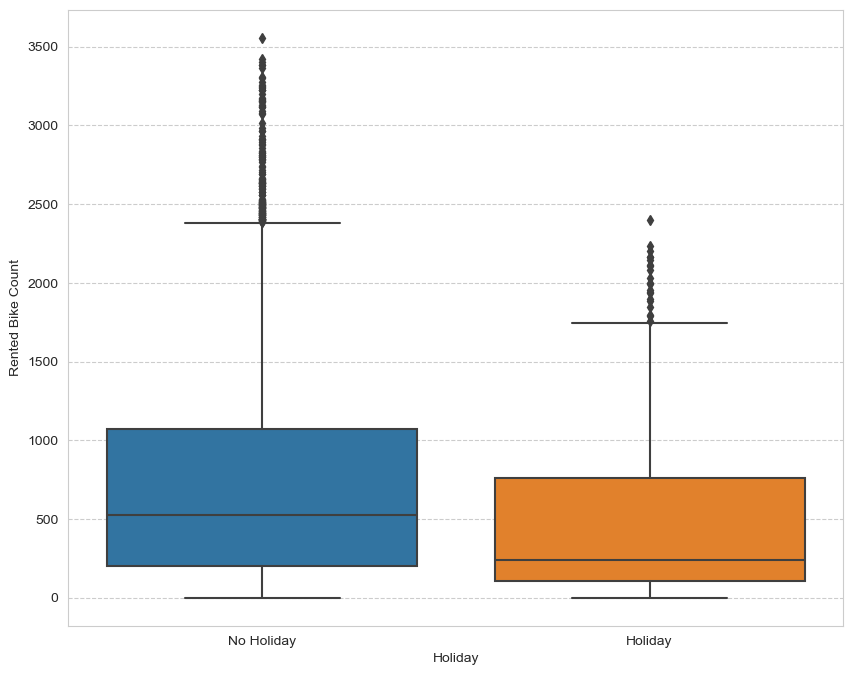

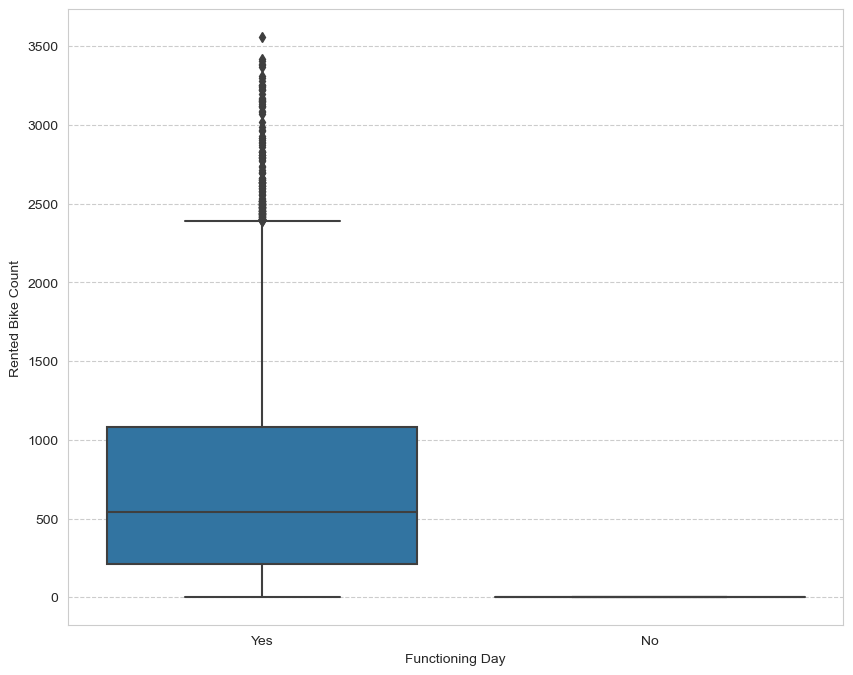

In [37]:
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

In [38]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

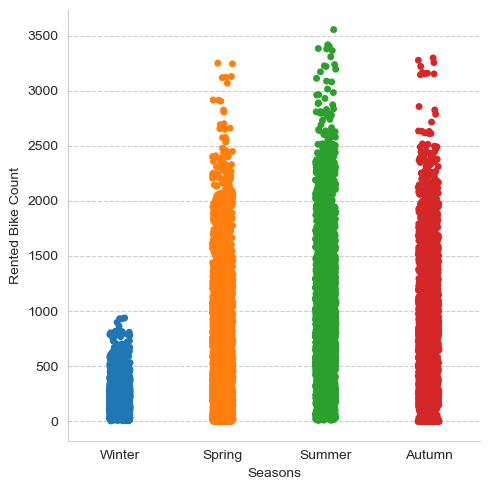

In [39]:
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

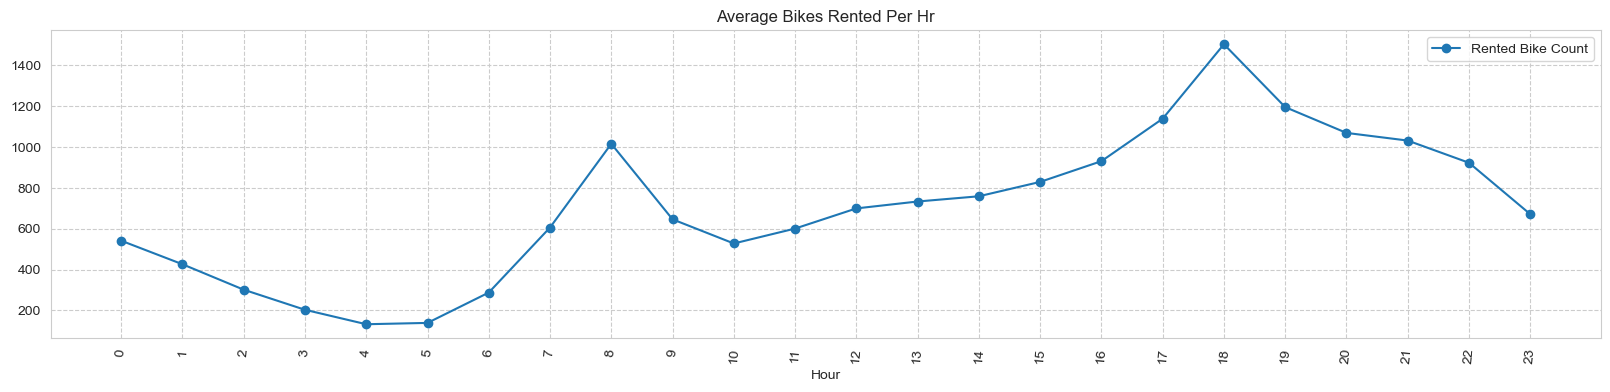

In [40]:
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

In [41]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)


In [42]:
dummy_categorical_feature


Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [43]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)


In [44]:
final_df.head()


Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0      1   
1                      0.0           0.0            0.0      1   
2                      0.0           0.0            0.0      1   
3                      0.0           0.0            0.0      1   
4                      0.0           0.0            0.0      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [45]:
final_df.describe().transpose()


count         mean         std   min     25%  \
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday         8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_No Holiday            1.00     1.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

<Figure size 2000x1600 with 0 Axes>

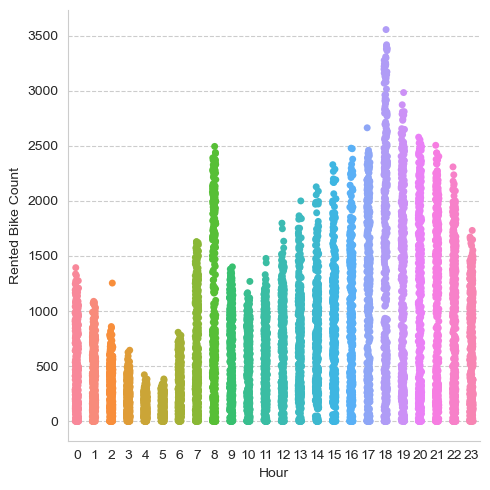

<Figure size 2000x1600 with 0 Axes>

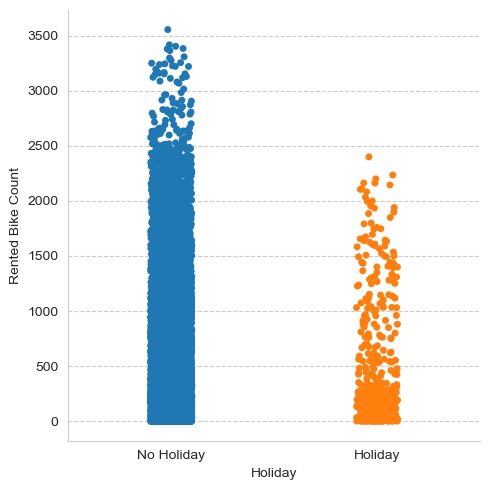

<Figure size 2000x1600 with 0 Axes>

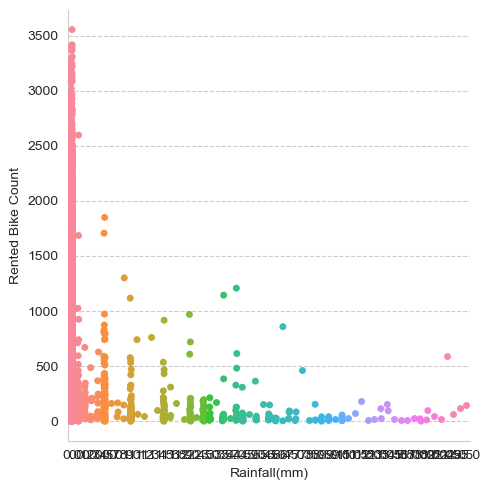

<Figure size 2000x1600 with 0 Axes>

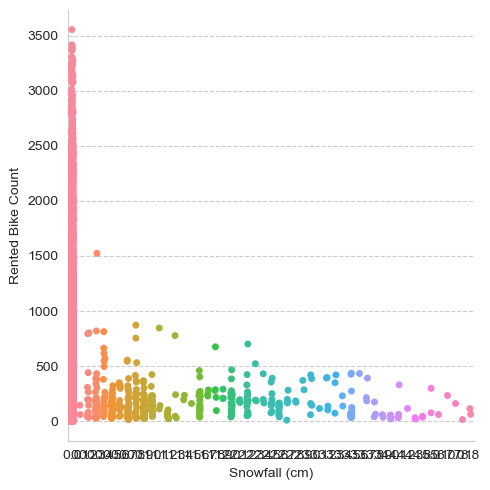

<Figure size 2000x1600 with 0 Axes>

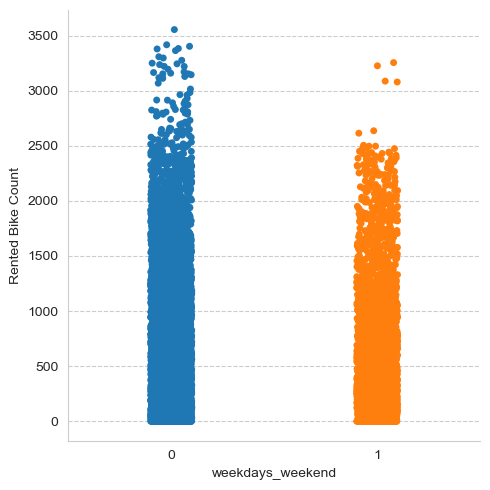

In [46]:
feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

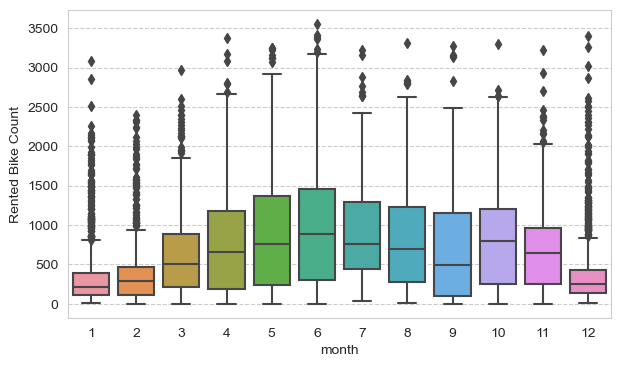

In [47]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()


In [48]:
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [49]:
def train_linear_model (model,X_train,y_train,X_test,y_test):

  model.fit(X_train,y_train)

  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  


  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [50]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    ('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [51]:
def get_features_importance (optimal_model,X_train):
  
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [52]:
pip install lime


     -------------------------------------- 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=a0b6b9ab9da52be7572d1e4a9e7cdade9453e7a5cfdcd58685e614ff2a4bfe78
  Stored in directory: c:\users\saharsh\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [53]:

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

In [54]:
X=final_df.drop(['Rented Bike Count'],axis=1)
X.shape

(8760, 16)

In [55]:
y=np.sqrt(final_df['Rented Bike Count'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


================Evalution Matrix=========================

MSE : 175590.55287332067
RMSE : 419.03526447462707
R2 : 0.5729108337712392
Adjusted R2 :  0.5697661367350404

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



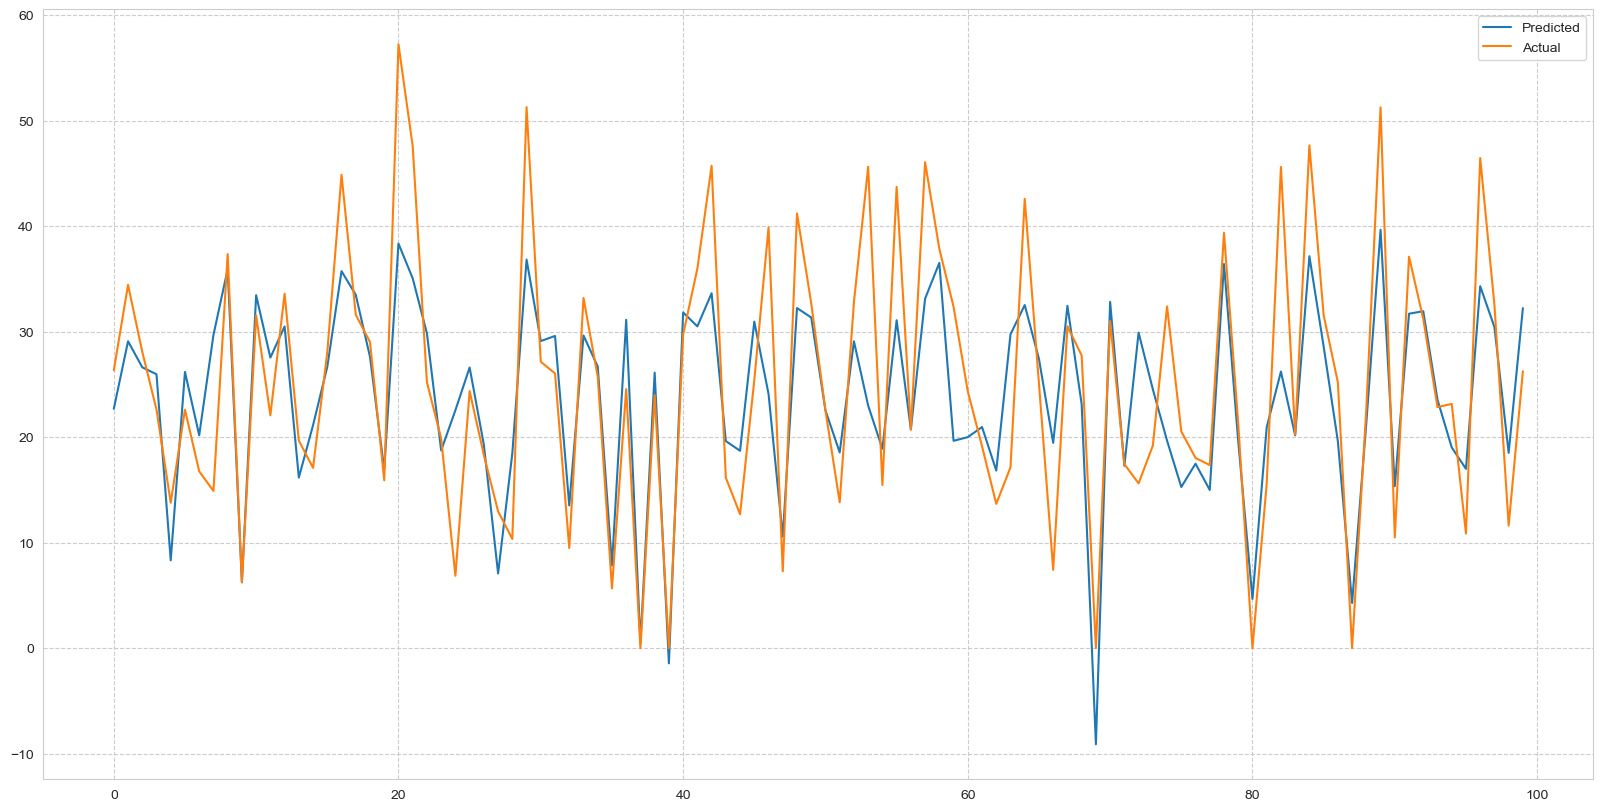

In [57]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
train_linear_model(linear_model, X_train, y_train, X_test, y_test)


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



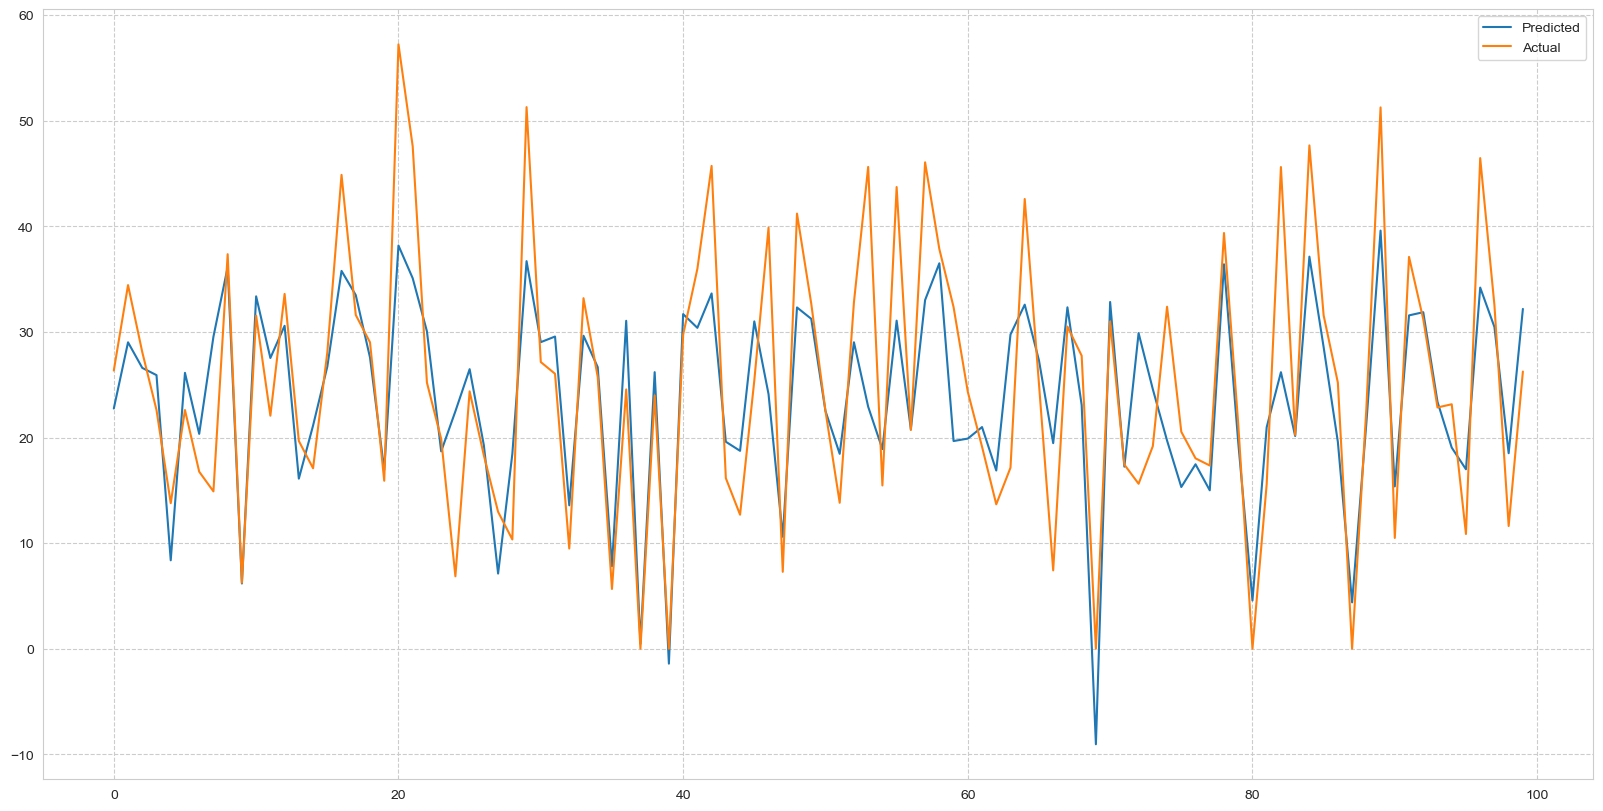

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)


================Evalution Matrix=========================

MSE : 175248.93506569546
RMSE : 418.62744184500787
R2 : 0.5737417512792716
Adjusted R2 :  0.5706031723655434

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



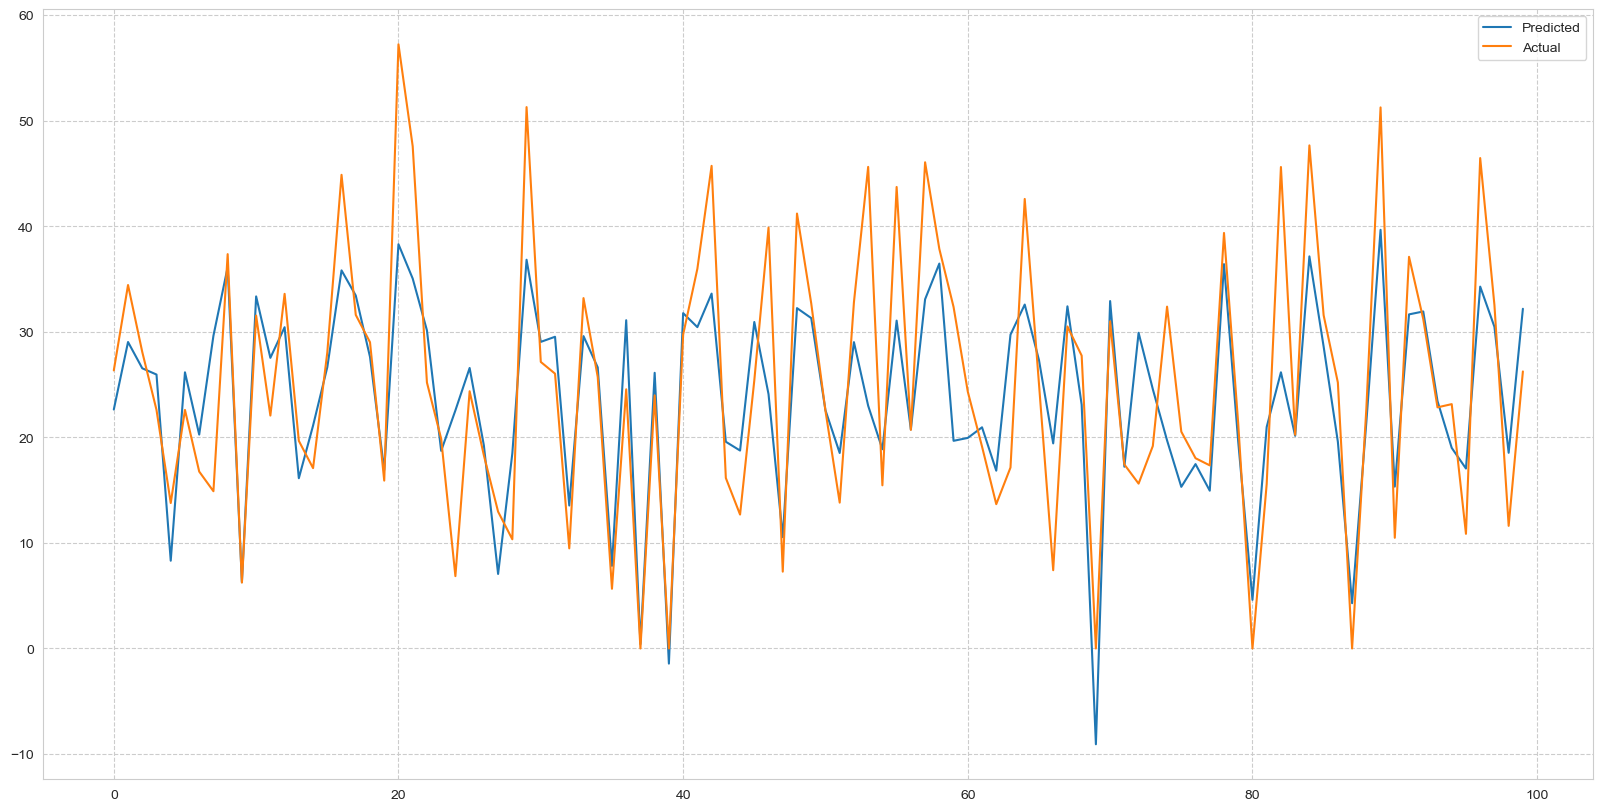

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

In [60]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()


parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 175346.86749857926
RMSE : 418.74439399062913
R2 : 0.5735035500752623
Adjusted R2 :  0.5703632172640356

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



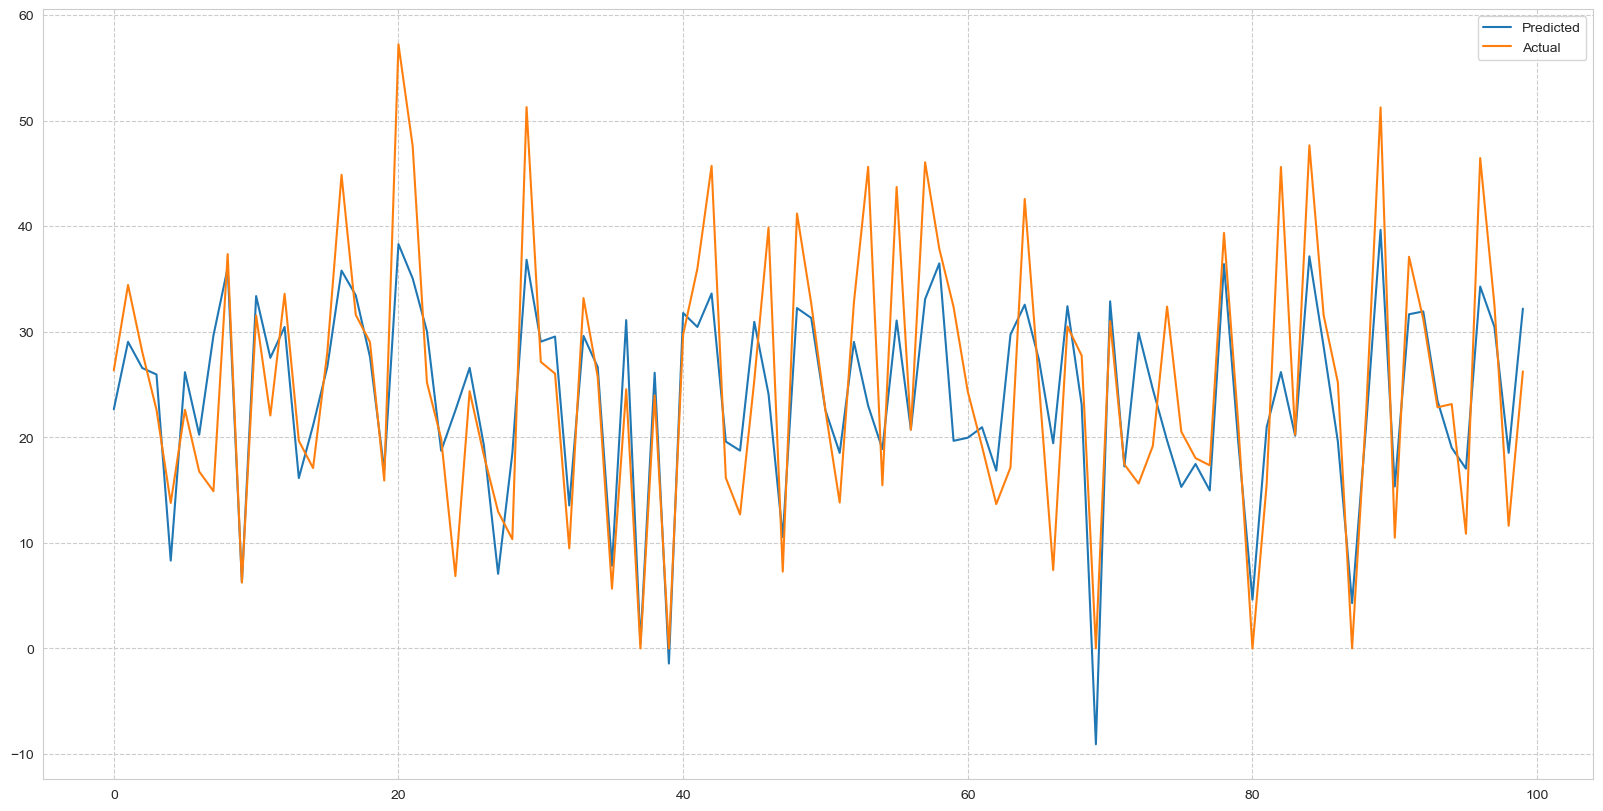

In [61]:
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)


In [62]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [63]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())



================Evalution Matrix=========================

MSE : 117604.48196839588
RMSE : 342.93509877000906
R2 : 0.7139504413720703
Adjusted R2 :  0.7118442320126378

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



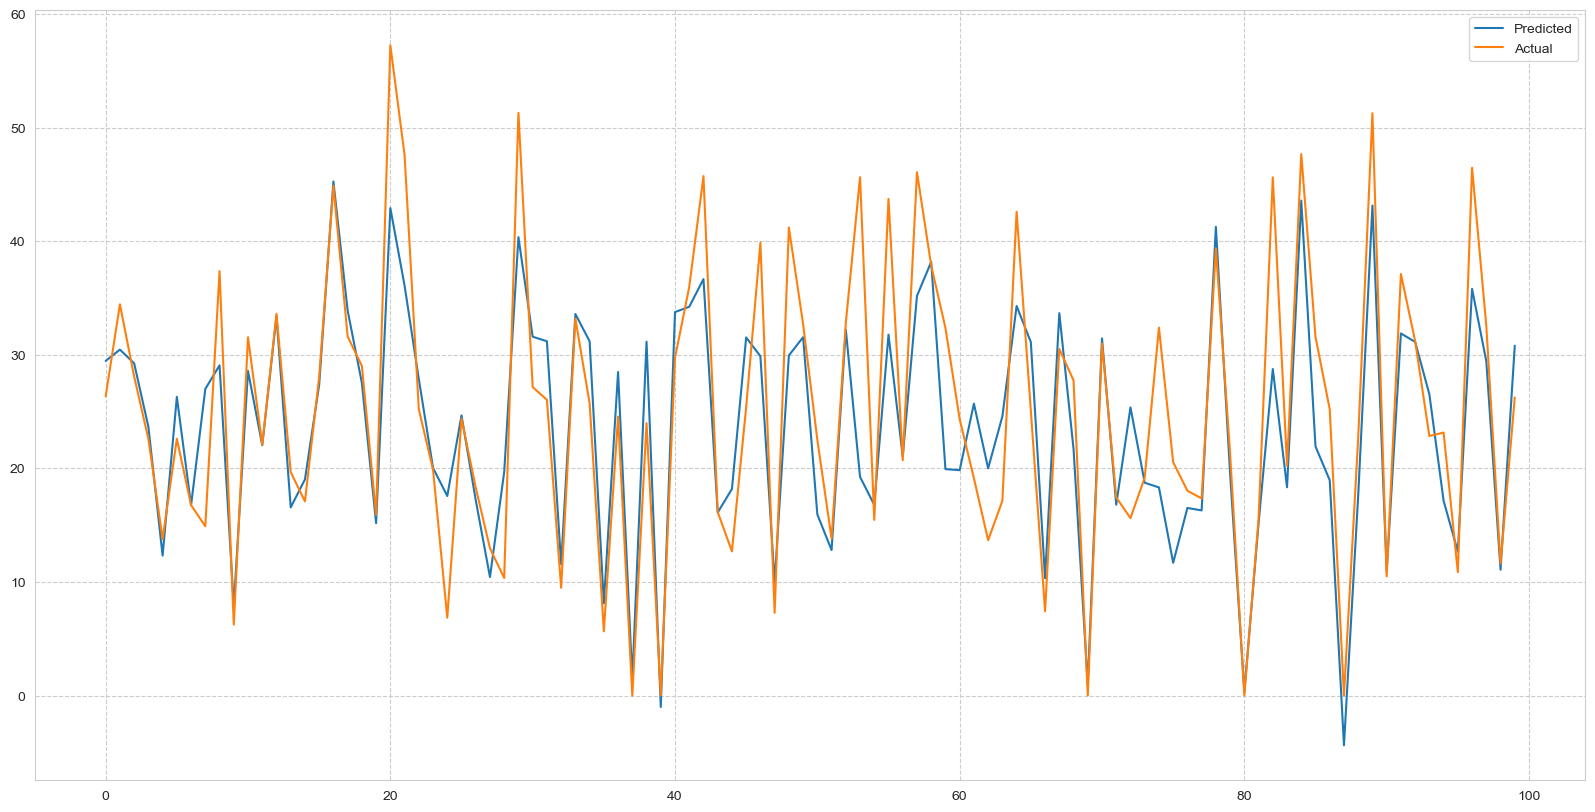

In [64]:
train_linear_model(pipe,X_train,y_train,X_test,y_test)

In [65]:
X=final_df.drop(['Rented Bike Count'],axis=1)


In [66]:
y=final_df['Rented Bike Count']


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()


In [71]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [74]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

AttributeError: 'NoneType' object has no attribute 'split'

In [75]:
from sklearn.tree import DecisionTreeRegressor



================Evalution Matrix=========================

MSE : 88629.21369863013
RMSE : 297.70658994827465
R2 : 0.7834090890816725
Adjusted R2 :  0.7818143101701708

================Evalution Matrix=========================



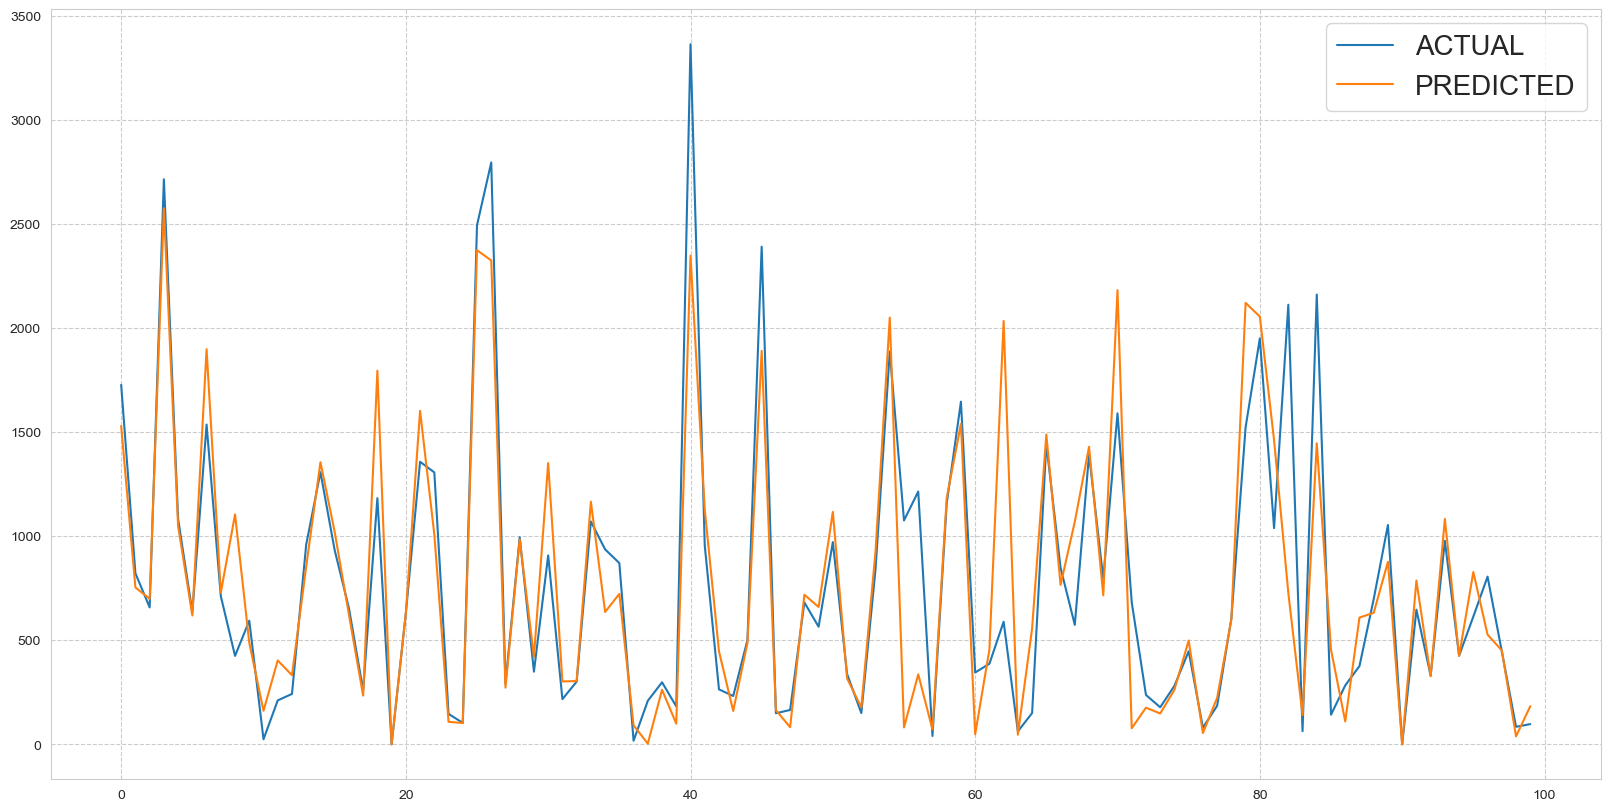

In [76]:
#Decision tree model 
dt_model = DecisionTreeRegressor()
run_model(dt_model,X_train,y_train,X_test,y_test)

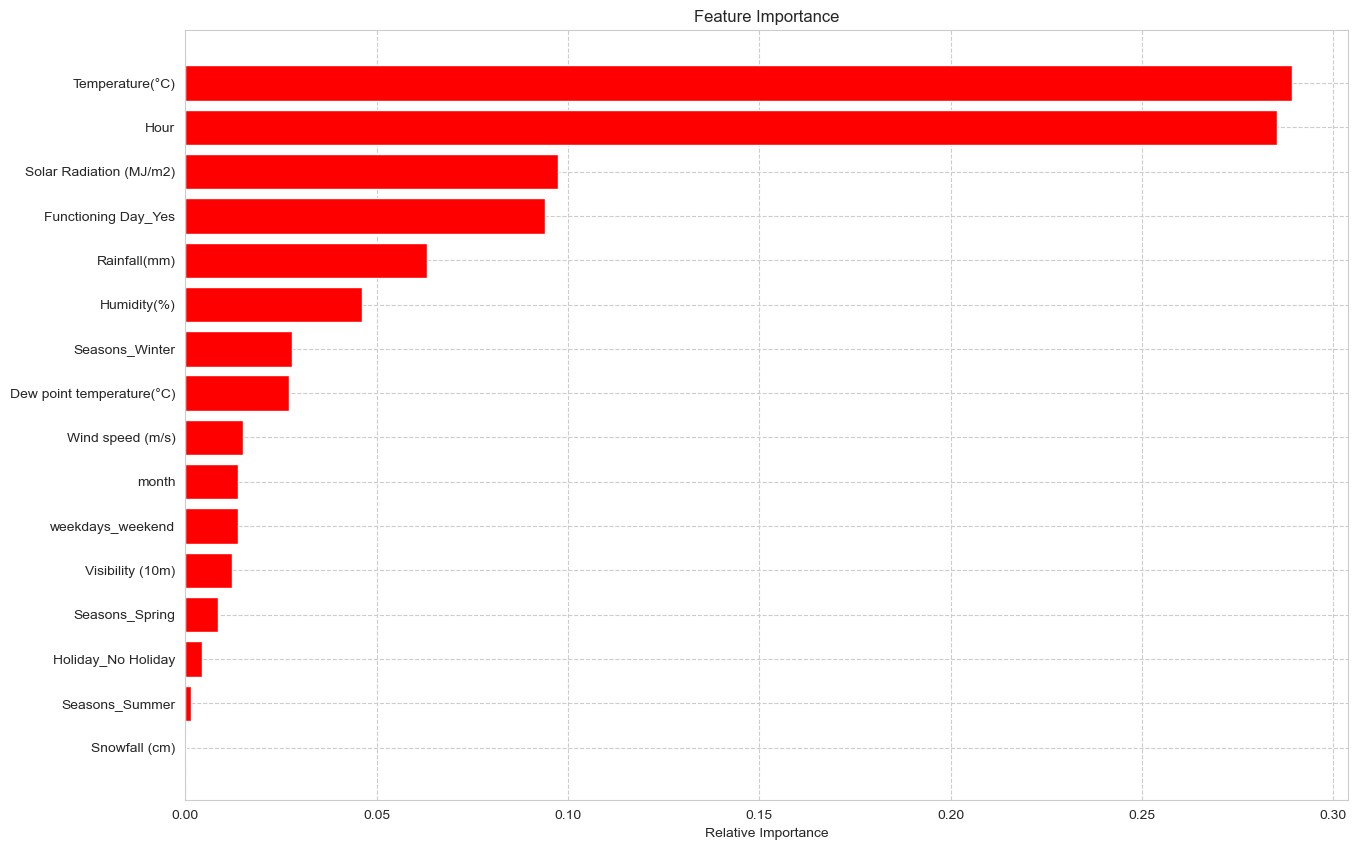

In [77]:
get_features_importance(dt_model,X_train)


In [78]:
from sklearn.ensemble import RandomForestRegressor


In [79]:
rf_model = RandomForestRegressor()

In [80]:
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [81]:
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 62489.37351074303
RMSE : 249.97874611803107
R2 : 0.8472892879606283
Adjusted R2 :  0.8461648648623172

================Evalution Matrix=========================



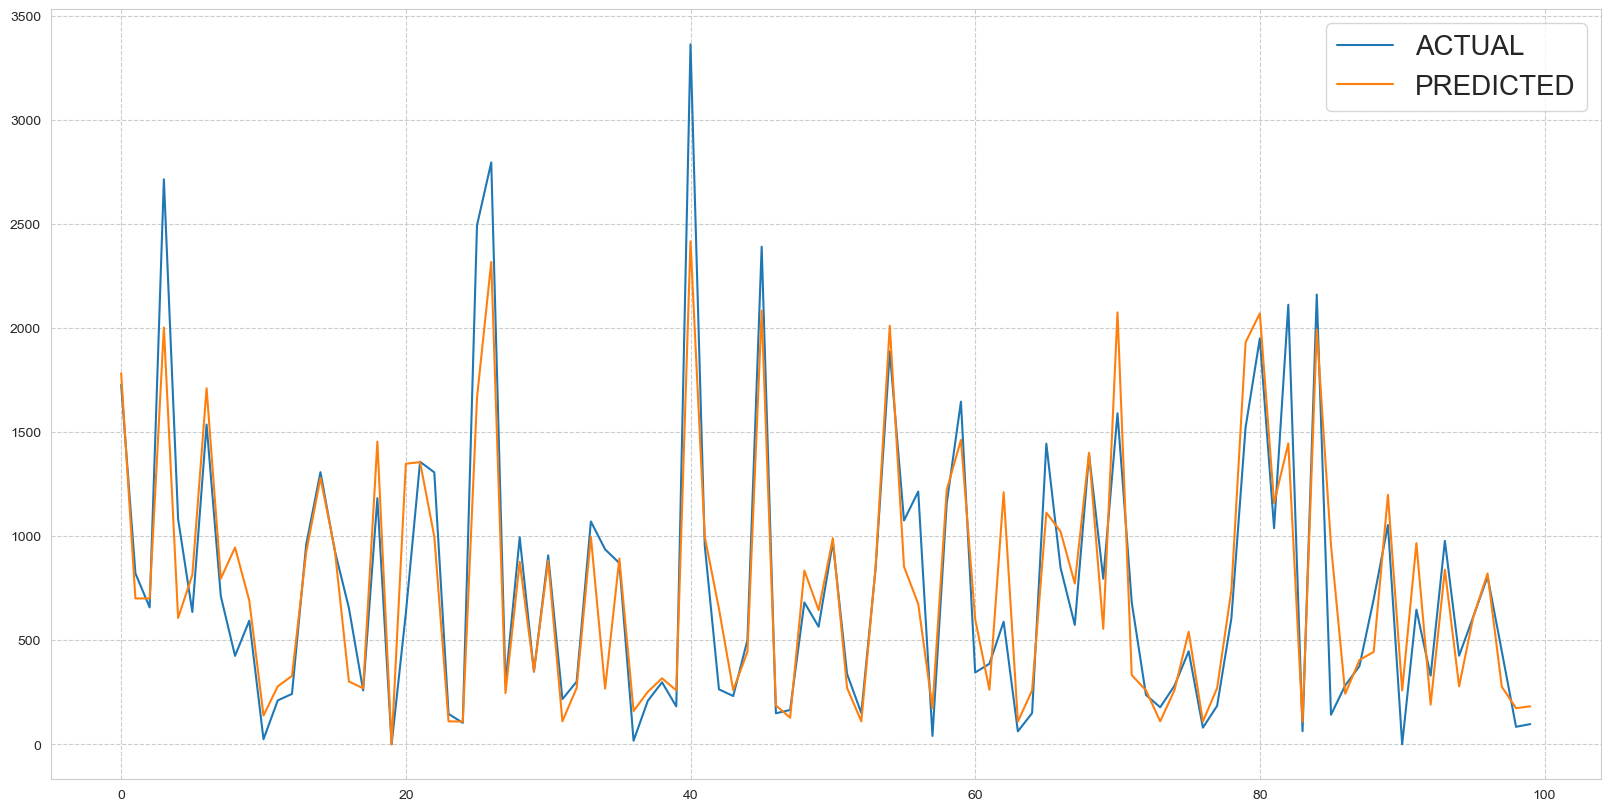

In [82]:
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [83]:
optimal_rf_model=rf_grid.best_estimator_


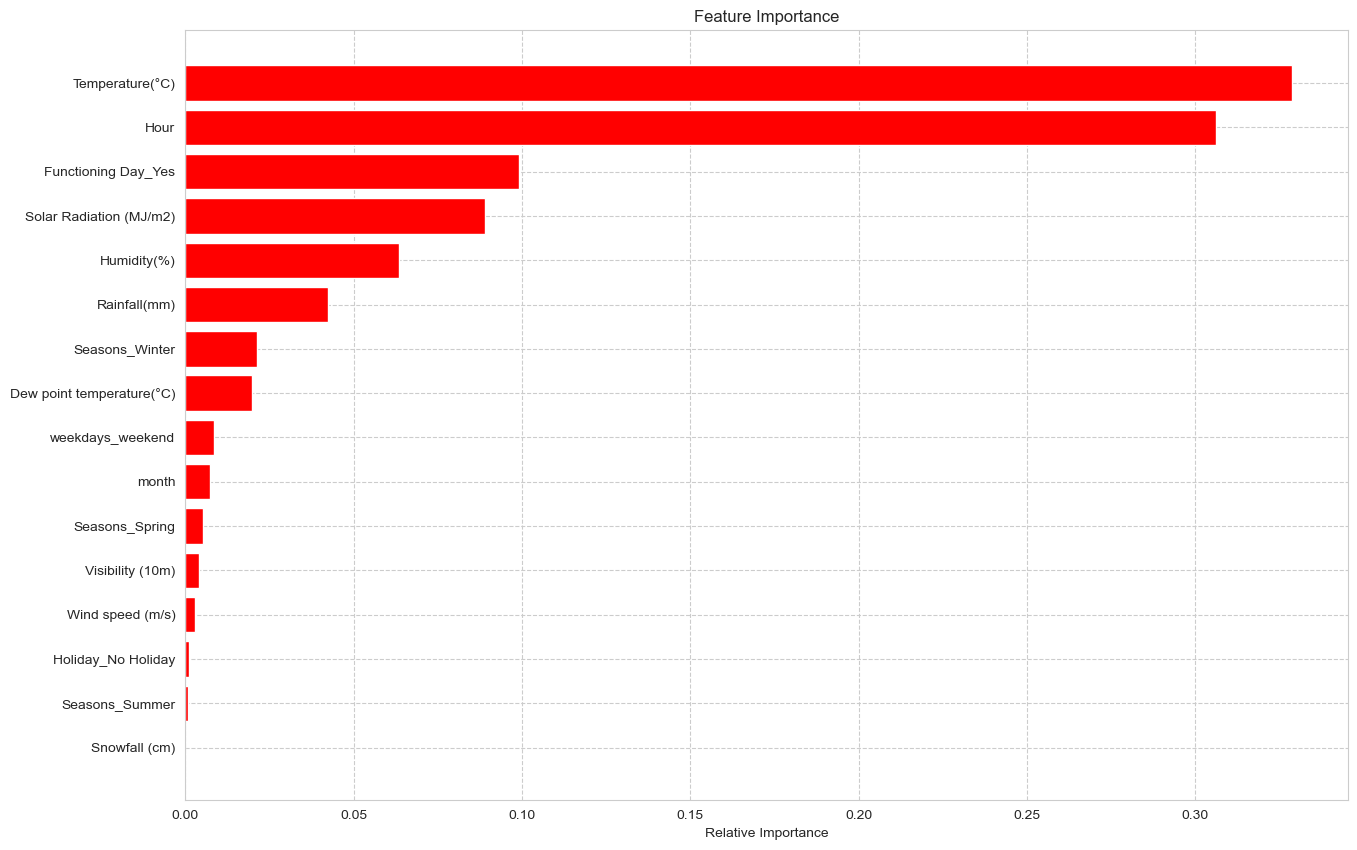

In [84]:
get_features_importance(optimal_rf_model,X_train)


In [85]:
## GRADIENT BOOSTING

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gb_model=GradientBoostingRegressor()


In [88]:
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [89]:
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)



================Evalution Matrix=========================

MSE : 54970.063639402455
RMSE : 234.45695476867914
R2 : 0.8656648788808939
Adjusted R2 :  0.8646757569582498

================Evalution Matrix=========================



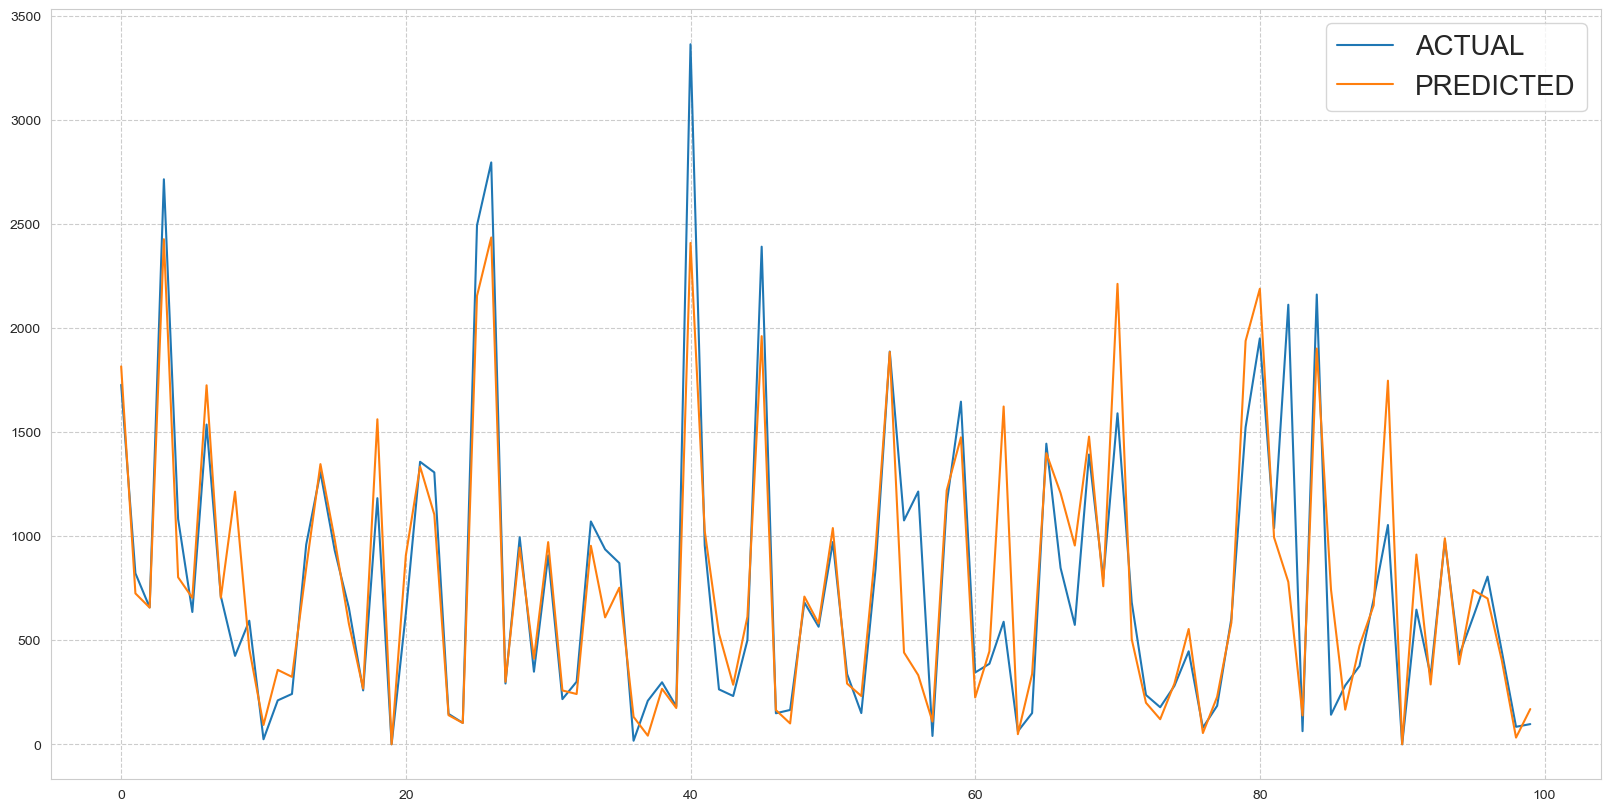

In [90]:
run_model(gb_grid,X_train,y_train,X_test,y_test)


In [91]:
optimal_gb_model=gb_grid.best_estimator_


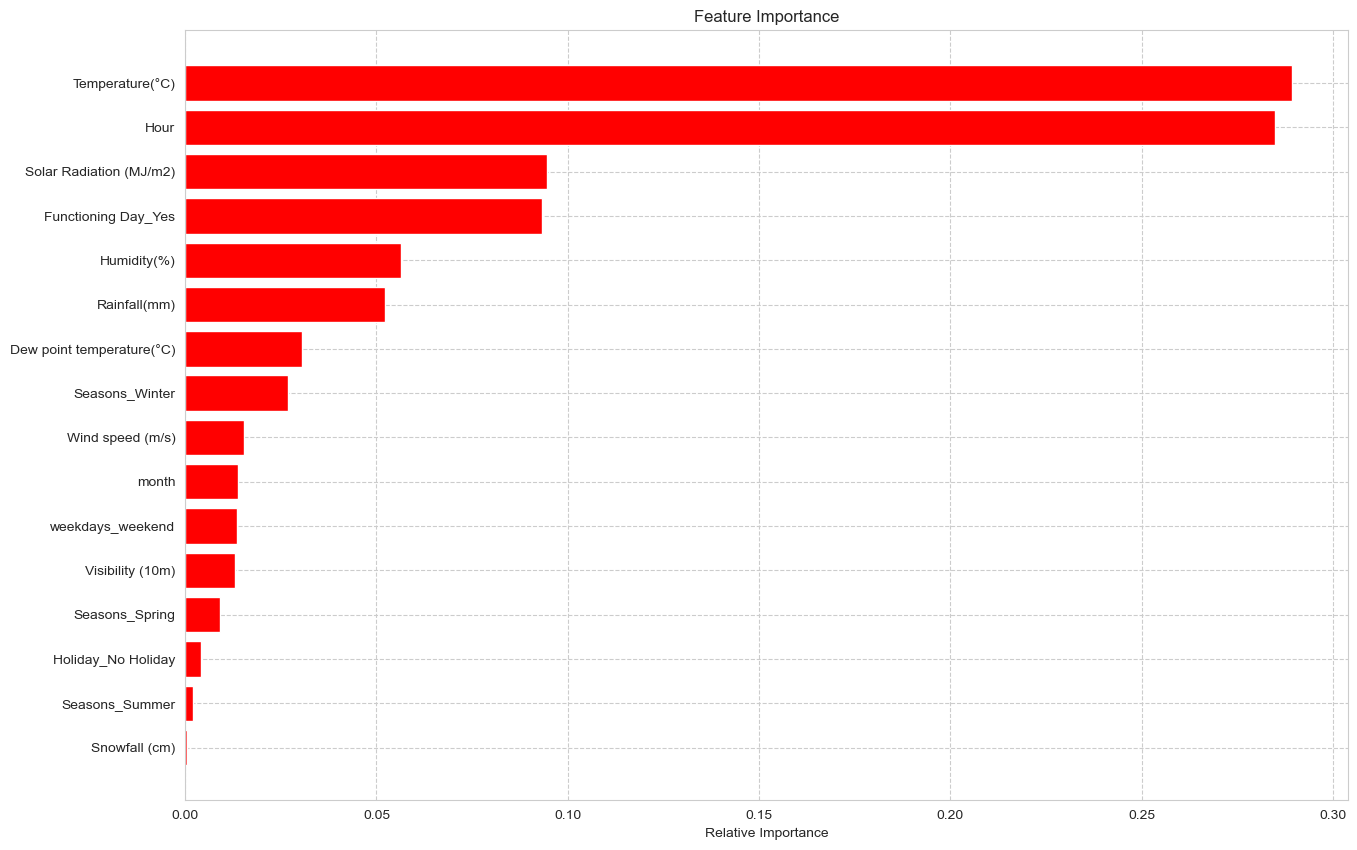

In [92]:
get_features_importance(optimal_gb_model,X_train)


In [93]:
## eXTREME GRADIENT BOOSTING

In [94]:
from xgboost import XGBRegressor


In [95]:
xgb_model=XGBRegressor()


In [96]:
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [97]:
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)



================Evalution Matrix=========================

MSE : 42764.78041172761
RMSE : 206.7964709847042
R2 : 0.895491990077968
Adjusted R2 :  0.8947224879340414

================Evalution Matrix=========================



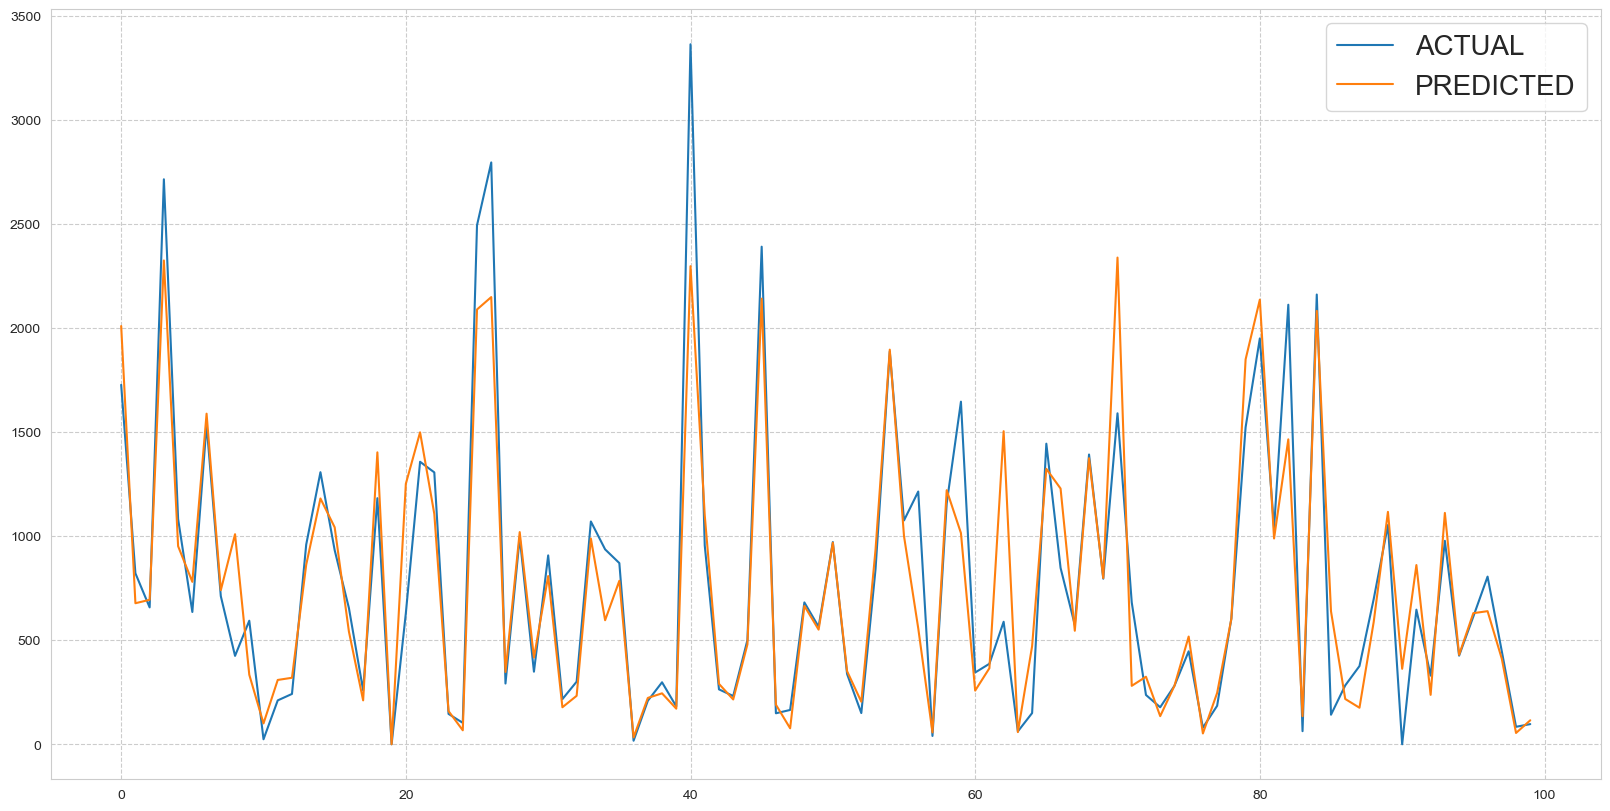

In [98]:
run_model(xgb_grid,X_train,y_train,X_test,y_test);


In [99]:
optimal_xgb_model=xgb_grid.best_estimator_


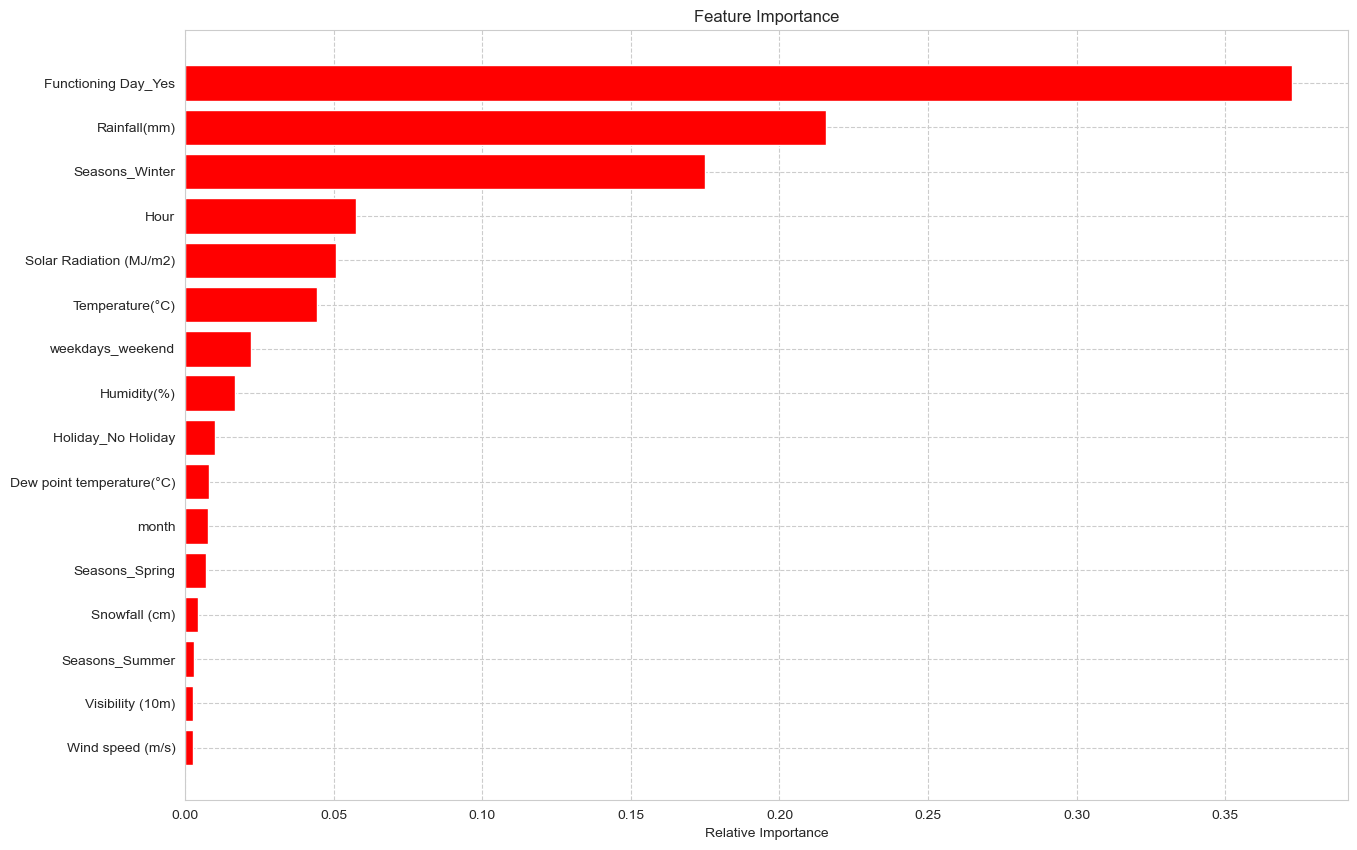

In [100]:
get_features_importance(optimal_xgb_model,X_train)


In [101]:
## CATBOOST

In [102]:
!pip install catboost


In [103]:
from catboost import CatBoostRegressor


In [104]:
cb_model=CatBoostRegressor(verbose=0)



================Evalution Matrix=========================

MSE : 36706.5353729677
RMSE : 191.58949703198164
R2 : 0.910297049908164
Adjusted R2 :  0.9096365587892181

================Evalution Matrix=========================



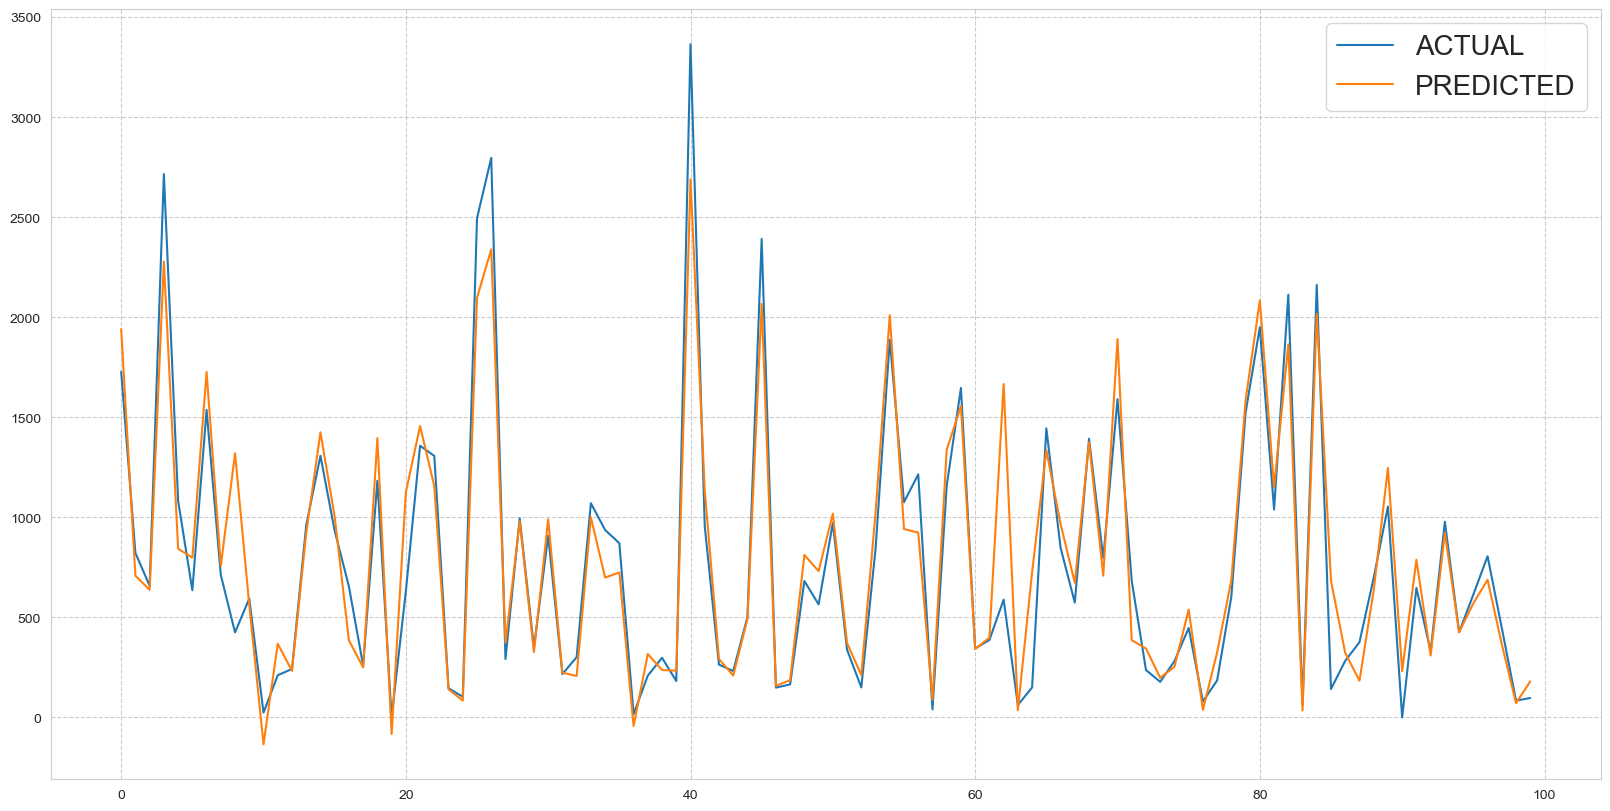

In [105]:
run_model(cb_model,X_train,y_train,X_test,y_test)


In [106]:
cb_model.get_all_params()


{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05512600019574165,
 'score_function': '

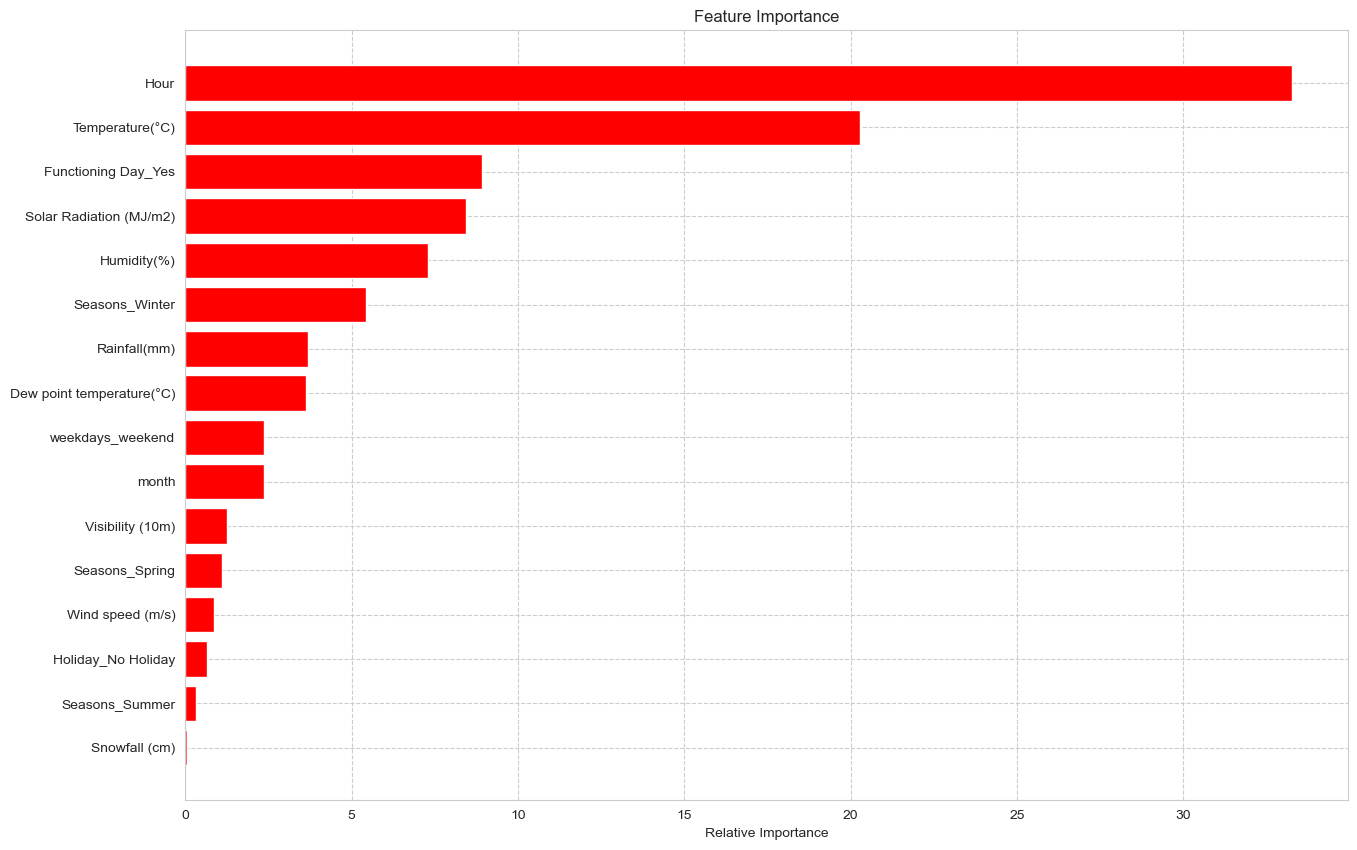

In [144]:
get_features_importance(cb_model,X_train)


In [145]:
##light GBM

In [146]:
import lightgbm as lgb


In [147]:
lgbr=lgb.LGBMRegressor()


In [148]:
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 6570, number of used features: 16
[LightGBM] [Info] Start training from score 705.796347
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

================Evalution Matrix=========================

MSE : 35410.75375394222
RMSE : 188.17745283094416
R2 : 0.9134636640

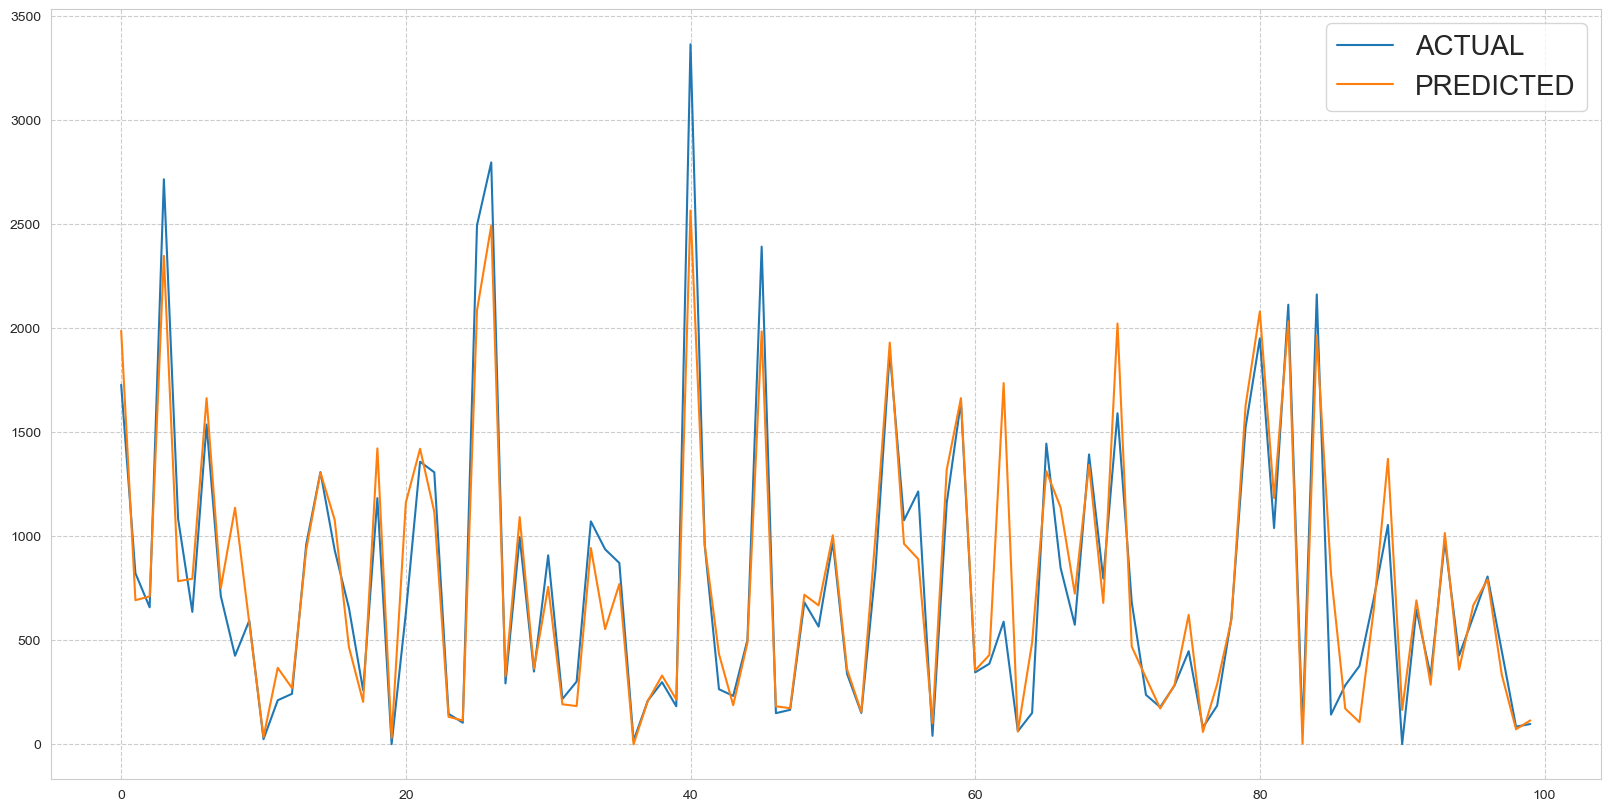

In [149]:
run_model(lgbr_grid,X_train,y_train,X_test,y_test)


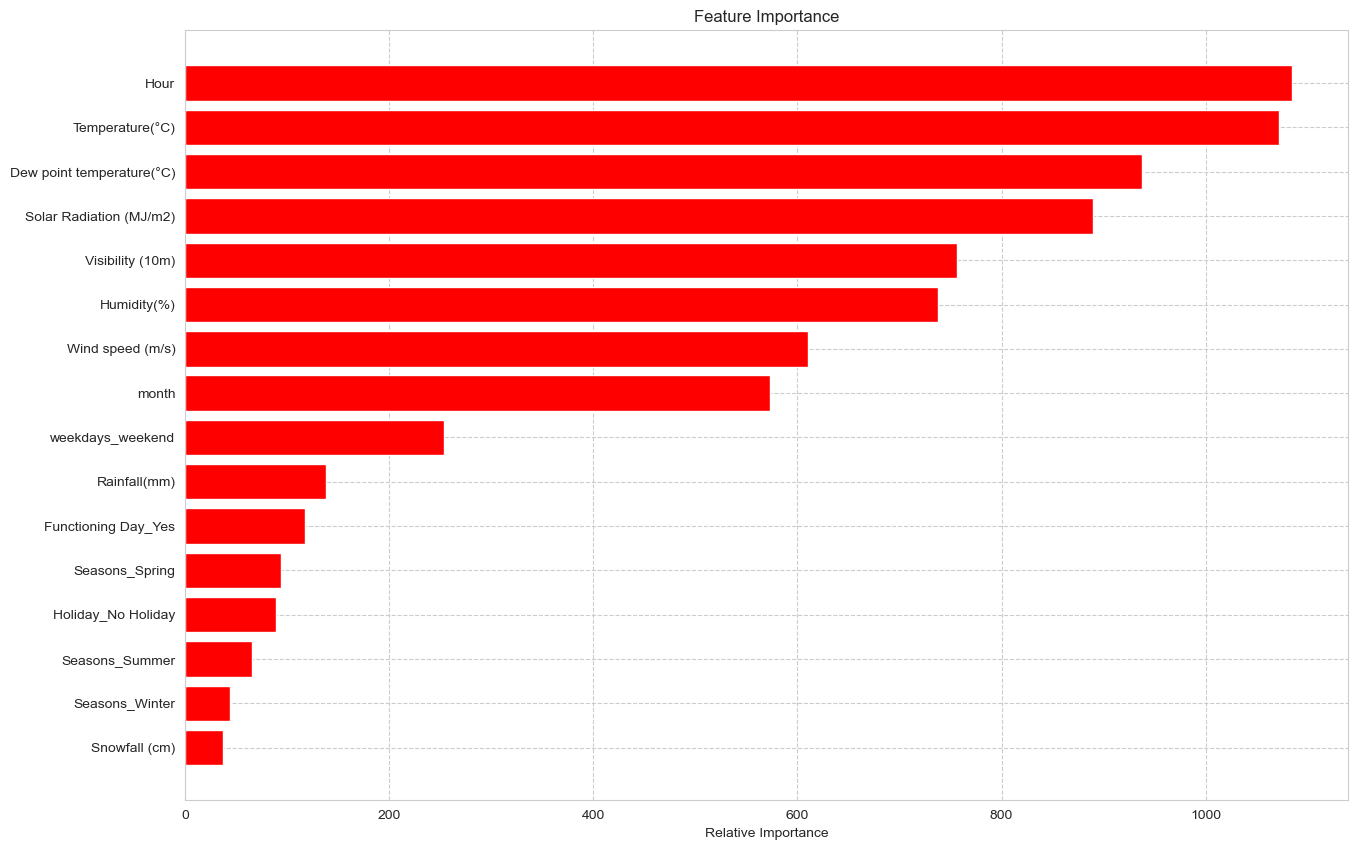

In [150]:
get_features_importance(lgbr_grid.best_estimator_,X_train)


In [151]:
#COMBINED EVALUATION MATRIX OF ALL THE MODELS 

In [152]:
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [153]:
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']


In [154]:
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)


In [155]:
matrices_df


Linear          Lasso          Ridge  \
Mean_square_error       175590.552873  175560.907118  175248.935066   
Root_Mean_square_error     419.035264     418.999889     418.627442   
R2                           0.572911       0.572983       0.573742   
Adjusted_R2                  0.569766       0.569839       0.570603   

                           Elasticnet     Polynomial  K-Nearyest_Neighbor  \
Mean_square_error       175346.867499  117604.481968         88629.213699   
Root_Mean_square_error     418.744394     342.935099           297.706590   
R2                           0.573504       0.713950             0.783409   
Adjusted_R2                  0.570363       0.711844             0.781814   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_square_error        62489.373511   54970.063639       42764.780412   
Root_Mean_square_error     249.978746     234.456955         206.796471   
R2                           0.847289       0.865665           0.895492   
Adjusted_R2                  0.846165       0.864676           0.894722   

                           Xtreme_GB      CATBoost      lightGBM  
Mean_square_error       36706.535373  35410.753754  35410.753754  
Root_Mean_square_error    191.589497    188.177453    188.177453  
R2                          0.910297      0.913464      0.913464  
Adjusted_R2                 0.909637      0.912826      0.912826

In [156]:
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})


In [157]:
final_matrices

Models  Mean_square_error  Root_Mean_square_error        R2  \
0                Linear      175590.552873              419.035264  0.572911   
1                 Lasso      175560.907118              418.999889  0.572983   
2                 Ridge      175248.935066              418.627442  0.573742   
3            Elasticnet      175346.867499              418.744394  0.573504   
4            Polynomial      117604.481968              342.935099  0.713950   
5   K-Nearyest_Neighbor       88629.213699              297.706590  0.783409   
6         Decision_Tree       62489.373511              249.978746  0.847289   
7         Random_Forest       54970.063639              234.456955  0.865665   
8     Gradient_Boosting       42764.780412              206.796471  0.895492   
9             Xtreme_GB       36706.535373              191.589497  0.910297   
10             CATBoost       35410.753754              188.177453  0.913464   
11             lightGBM       35410.753754              188.177453  0.913464   

    Adjusted_R2  
0      0.569766  
1      0.569839  
2      0.570603  
3      0.570363  
4      0.711844  
5      0.781814  
6      0.846165  
7      0.864676  
8      0.894722  
9      0.909637  
10     0.912826  
11     0.912826

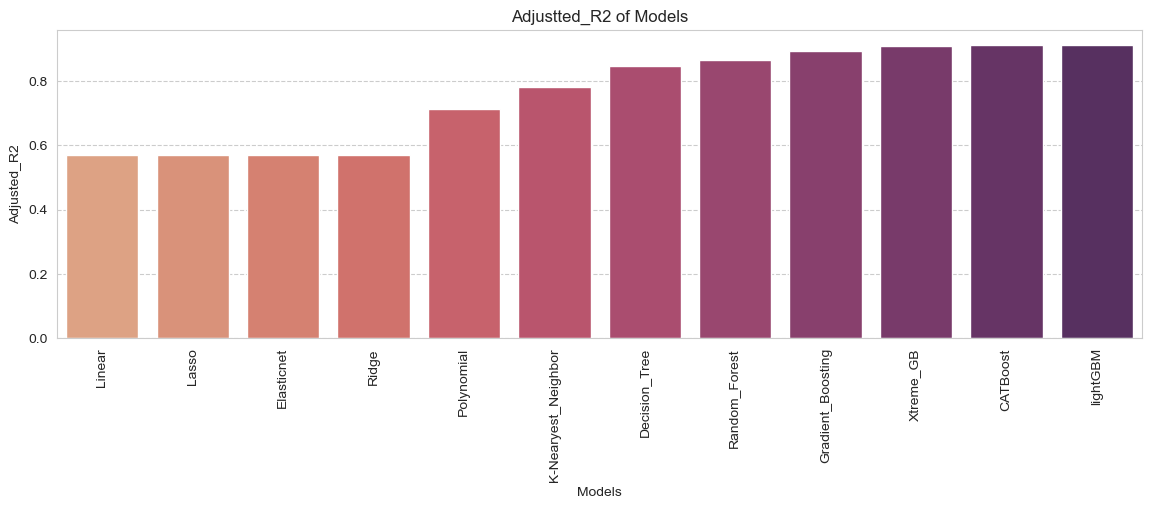

In [158]:
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

In [159]:
## SHAP

In [164]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [169]:
pip install --upgrade shap

Note: you may need to restart the kernel to use updated packages.


In [171]:
pip install numba 

Note: you may need to restart the kernel to use updated packages.


In [173]:
pip install njit

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement njit (from versions: none)
ERROR: No matching distribution found for njit


In [194]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [196]:
pip install darkgrid

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement darkgrid (from versions: none)
ERROR: No matching distribution found for darkgrid


In [221]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

SystemError: initialization of _internal failed without raising an exception

In [222]:
for_instance=2

In [223]:
shap.initjs()
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
shap_values = explainer(X_test,check_additivity=False)
shap.plots.force(shap_values[for_instance])


NameError: name 'shap' is not defined

In [224]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

NameError: name 'shap' is not defined

In [225]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

NameError: name 'shap' is not defined

In [226]:
## ELI5

In [227]:
pip install eli5


Note: you may need to restart the kernel to use updated packages.


In [228]:
pip install eli

Note: you may need to restart the kernel to use updated packages.


In [229]:
import eli5 as eli


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\saharsh\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py)

In [1]:
feature_names=list(X_test.columns)


NameError: name 'X_test' is not defined

In [2]:
for_instance=2


In [3]:
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

NameError: name 'eli' is not defined

In [4]:
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

NameError: name 'eli' is not defined

In [5]:
## THANK YOU 